#### IST 718 – Big Data Analytics - Syracuse University - Professor Jillian Lando

#### Melissa Mosier and Sintia Stabel


## Optimizing Credit Risk Assessment: Leveraging Customer Segmentation, Fraud Detection, and Default Risk Analysis

#### Introduction:

In the ever-evolving landscape of credit risk assessment, it is imperative for lenders to explore innovative approaches that enhance their understanding of customers' credit behavior. This analysis delves into the potential of customer segmentation, fraud detection, and default risk analysis as powerful tools to elevate overall credit risk assessment. By harnessing these techniques, lenders can gain invaluable insights into distinct customer groups exhibiting similar credit behavior patterns and detect potential instances of fraudulent activities.

The objective of this comprehensive examination is to scrutinize customer segmentation, fraud detection, and default risk analysis within the realm of credit risk assessment. The central focus revolves around identifying discrete customer clusters characterized by shared credit behavior patterns, while also unveiling potential occurrences of fraudulent activities. Accomplishing this objective holds the potential to provide profound insights that significantly enhance the accuracy of credit risk assessment, fortify risk management approaches, and optimize lending policies and procedures, thereby empowering lenders to make more informed decisions.

### Analysis and Models

#### About the Data


The data requirements to complete the forementioned objective includes customer demographics, credit scores, loan history, transaction history, and other relevant data. A series of credit card datasets obtained from Kaggle.com were used to perform the analysis. Once the data was collected, it was be pre-processed by filling in missing values, transforming the data, and normalizing the data.

##### Data Sources:

Customer segmentation: https://www.kaggle.com/datasets/samuelcortinhas/credit-card-classification-clean-data and https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction

Fraud detection: https://www.kaggle.com/datasets/shubhamlipare/credit-card-fraud-detection-data


Default Risk Analysis: https://www.kaggle.com/datasets/mariosfish/default-of-credit-card-clients



### Customer Segmentation and Credit Approval Analysis:

Customer segmentation analysis involves grouping customers into segments based on shared characteristics such as demographics, behavior, and purchasing habits. These segments can provide valuable insights into credit behavior patterns and help optimize credit risk assessment. 

Our credit card dataset comprises 9708 rows and 20 columns. The following variables were selected for for modeling:'Gender', 'Own_car', 'Own_property', 'Unemployed', 'Num_children', 'Num_family', 'Account_length', 'Total_income', 'Age', 'Years_employed', and 'Target'.

The primary objective of our analysis is to determine credit approval for each customer, with the 'Target' variable serving as the predicted variable. Various classification models to classify customers as approved or not approved for credit were employed. Additionally, a clustering model to identify groups of customers sharing similar characteristics, was used to aid in the segmentation process.

#### Data Exploration:

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read the data
segmentation = pd.read_csv("Segmentation2.csv")
segmentation.head(3)

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0


In [3]:
# Select appropriate columns
seg = segmentation[["Gender","Own_car","Own_property",'Unemployed','Num_children','Num_family','Account_length',
                   "Total_income",'Age','Years_employed',"Target"]]
seg.head(3)

,Gender,Own_car,Own_property,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
0,1,1,1,0,0,2,15,427500.0,32.868574,12.435574,1
1,1,1,1,0,0,2,29,112500.0,58.793815,3.104787,0
2,0,0,1,0,0,1,4,270000.0,52.321403,8.353354,0


Various exploratory analysis revealed that the majority of the customer who have been approved for credit cards had the following characteristics: 
Own a home, were employed, were married and had a median income of $157,500.00 per year.

In [14]:
range_info = seg[seg['Target'] == 1]
total_income_min = range_info['Total_income'].min()
total_income_max = range_info['Total_income'].max()
total_income_mean = range_info['Total_income'].mean()
total_income_median = range_info['Total_income'].median()

print("Minimum Total Income:", total_income_min)
print("Maximum Total Income:", total_income_max)
print("Mean Total Income:", total_income_mean)
print("Median Total Income:", total_income_median)

Minimum Total Income: 27000.0
Maximum Total Income: 1575000.0
Mean Total Income: 186007.00896336712
Median Total Income: 157500.0


In [19]:
print(seg[seg['Target']== 0].count())
print(seg[seg['Target'] != 0].count())

Gender            8426
Own_car           8426
Own_property      8426
Unemployed        8426
Num_children      8426
Num_family        8426
Account_length    8426
Total_income      8426
Age               8426
Years_employed    8426
Target            8426
dtype: int64
Gender            1283
Own_car           1283
Own_property      1283
Unemployed        1283
Num_children      1283
Num_family        1283
Account_length    1283
Total_income      1283
Age               1283
Years_employed    1283
Target            1283
dtype: int64


The dataset breakdown reveals important information about the variables gender, property ownership, car ownership, and the number of children. In the dataset, the gender variable is represented numerically, where 1 denotes male and 0 denotes female.

Regarding property ownership, the dataset uses the value of 1 to indicate "yes" for owning property. Similarly, for car ownership, a value of 1 represents "yes" for owning a car. The number of children variable indicates the count of children a customer has.

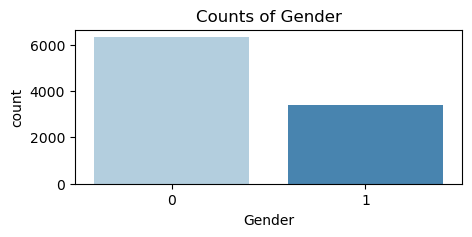

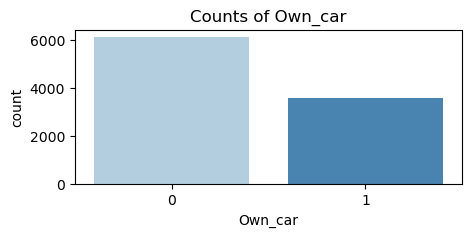

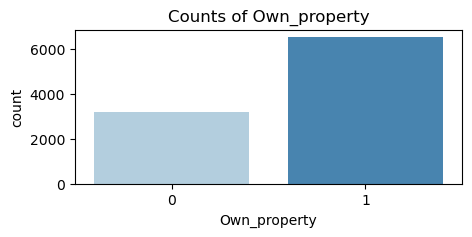

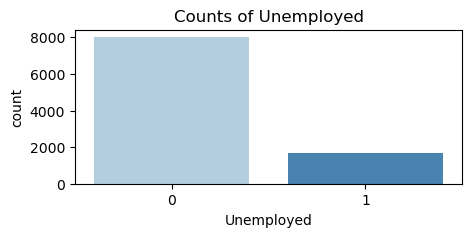

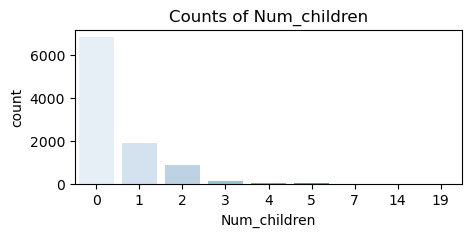

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read data
df = seg
# Bar Plot - Categorical Variables
categorical_vars = ['Gender', 'Own_car', 'Own_property', 'Unemployed', 'Num_children']
for var in categorical_vars:
    plt.figure(figsize=(5, 2))
    sns.countplot(x=var, data=df, palette = 'Blues')
    plt.title(f'Counts of {var}')
    plt.show()


Following is the distribution breakdown of customers based on total income, age, years employed, and account length in months. The majority of customers fall within the age range of 25 to 55 years. The mean age of the customer population is 42 years, indicating a relatively balanced distribution across different age groups.

In terms of total income, the median value stands at $157,000 per annum. This statistic provides a measure of the central tendency of the income distribution, suggesting that the majority of customers have an income close to or around this median value.Furthermore, the analysis takes into account the years employed by customers, which provides an indication of their work experience and stability. This information can contribute to assessing their creditworthiness and risk profile.

Additionally, the account length in months offers insights into the duration for which customers have held their accounts. This factor may influence credit behavior, as longer account durations can indicate a history of credit management and reliability.

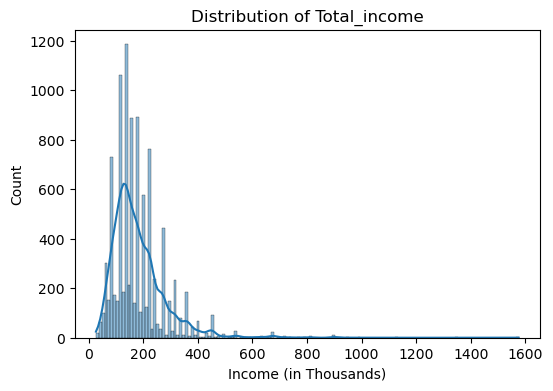

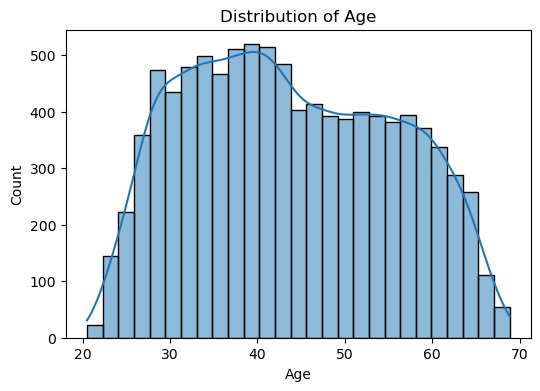

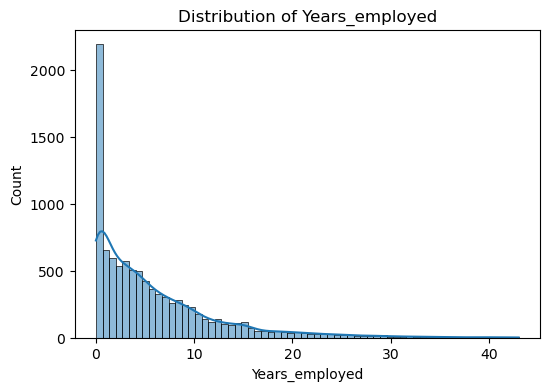

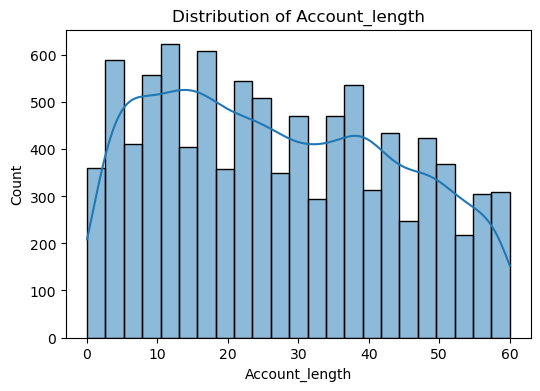

In [10]:
# Histograms - Numerical Variables with Income in Thousands
numerical_vars = ['Total_income', 'Age', 'Years_employed', 'Account_length']
for var in numerical_vars:
    plt.figure(figsize=(6, 4))
    
    # Convert 'Total_income' to thousands
    if var == 'Total_income':
        sns.histplot(data=df, x=df[var]/1000, kde=True)
        plt.xlabel('Income (in Thousands)')
    else:
        sns.histplot(data=df, x=var, kde=True)
        plt.xlabel(var)
        
    plt.title(f'Distribution of {var}')
    plt.show()

The heatmap provides a correlation plot for the numerical variables in the segmentation data set. It visualizes the correlation coefficients between these variables using a color map and displays the coefficients as annotations on the plot. No significant correlations were detected.

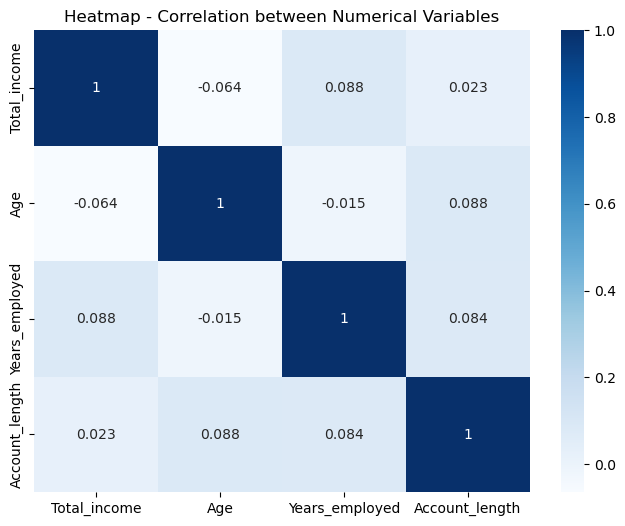

In [12]:
# Heatmap/Correlation Plot
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_vars].corr(), annot=True, cmap='Blues')
plt.title('Heatmap - Correlation between Numerical Variables')
plt.show()

#### Random Forest Classifier


A random forest classifier consists of a collection of decision trees, where each tree is trained on a randomly selected subset of the data. During training, the algorithm constructs multiple decision trees by considering different subsets of features and examples from the dataset. Each decision tree independently makes predictions, and the final prediction of the random forest is determined by aggregating the predictions of all the individual trees.

The random forest classifier is well-suited for credit approval segmentation because it can handle a large number of input variables, including both numerical and categorical features. It can capture complex relationships between the features and the target variable, allowing it to effectively classify customers' creditworthiness.

In the context of customer credit approval segmentation, a random forest classifier is a machine learning algorithm that combines the principles of ensemble learning and decision trees to make predictions about whether a customer's credit should be approved or denied

The "Target" variable was set as the predicted variable, which represents the credit approval outcome. The data is split into training and testing sets using the train_test_split function. The training set (X_train, y_train) will be used to train the model, and the testing set (X_test, y_test) will be used to evaluate its performance. The test size is set to 0.5, which means a 50% split.

The outcome of the model produced an accuracy score of was 0.86. Overall, The results suggest that the model performs well in predicting non-approval (class 0) with high precision and recall. However, it struggles to identify instances of credit approval (class 1), resulting in low precision and recall for that class. The low F1-score for class 1 further emphasizes the challenge of correctly predicting positive outcomes.

In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

df = pd.DataFrame(seg)

# Select the features and target variable
features = df.drop('Target', axis=1)
target = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.5, random_state=42)

# Initialize the random forest model
rf = RandomForestClassifier()

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
predictions = rf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print the confusion matrix
print("Confusion matrix:")
print(cm)

# Compute the classification report
cr = classification_report(y_test, predictions)

# Print the classification report
print("Classification report:")
print(cr)

# Compute the accuracy score
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy score
print("Accuracy:", accuracy)

Confusion matrix:
[[4196    9]
 [ 647    3]]
Classification report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      4205
           1       0.25      0.00      0.01       650

    accuracy                           0.86      4855
   macro avg       0.56      0.50      0.47      4855
weighted avg       0.78      0.86      0.80      4855

Accuracy: 0.8648815653964984


#### Random Forest with 10,000 Trees and 60 - 40 Train-Test Split

The precision for class 0 is 0.86, indicating a relatively high proportion of true negatives among the predicted negatives. The precision for class 1 is 0.43, suggesting a low proportion of true positives among the predicted positives. However the true positives improved from 0.25 to 0.43 from the previous run. 

The overall accuracy score is 0.86, indicating the proportion of correctly predicted outcomes (both true positives and true negatives) among all instances. These results suggest that the model performs well in predicting non-approval (class 0) with high precision and recall. Similar to the previous run, the model struggles to identify instances of credit approval (class 1), resulting in low precision and recall for that class.

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

df = pd.DataFrame(seg)

# Select the features and target variable
features = df.drop('Target', axis=1)
target = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=42)

# Initialize the random forest model with 10000 trees
rf = RandomForestClassifier(n_estimators=10000)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
predictions = rf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print the confusion matrix
print("Confusion matrix:")
print(cm)

# Compute the classification report
cr = classification_report(y_test, predictions)

# Print the classification report
print("Classification report:")
print(cr)

# Compute the accuracy score
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy score
print("Accuracy:", accuracy)

Confusion matrix:
[[3337    4]
 [ 540    3]]
Classification report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      3341
           1       0.43      0.01      0.01       543

    accuracy                           0.86      3884
   macro avg       0.64      0.50      0.47      3884
weighted avg       0.80      0.86      0.80      3884

Accuracy: 0.8599382080329557


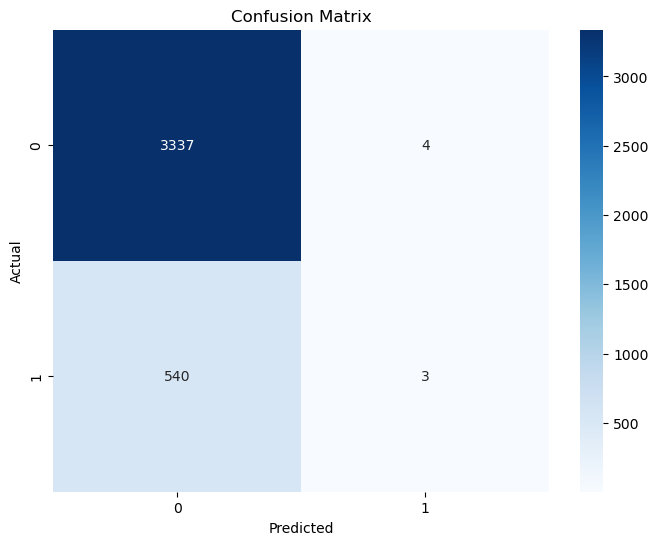

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Visualiaztion of the classification report:

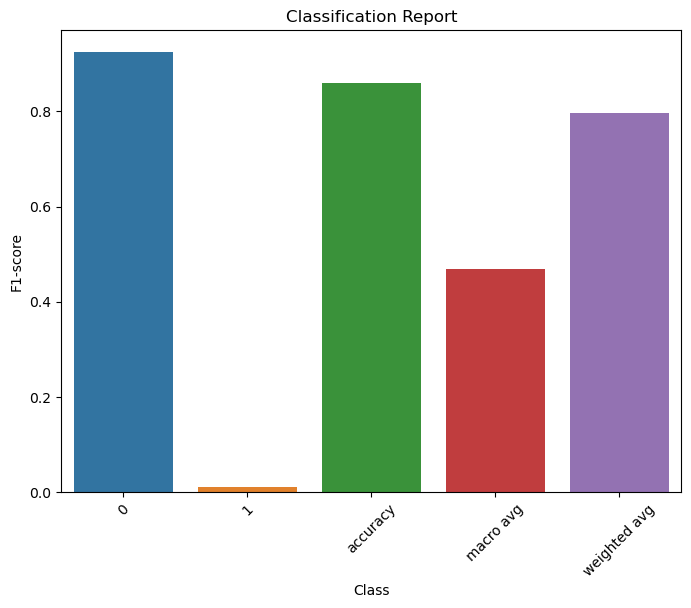

In [23]:
# Compute the classification report
# These visualizations can provide a clearer understanding of the model's performance 
# and aid in interpreting the results
cr = classification_report(y_test, predictions, output_dict=True)
class_report = pd.DataFrame(cr).transpose()

# Plot the precision, recall, and F1-score for each class
plt.figure(figsize=(8, 6))
sns.barplot(x=class_report.index, y=class_report['f1-score'])
plt.title('Classification Report')
plt.xlabel('Class')
plt.ylabel('F1-score')
plt.xticks(rotation=45)
plt.show()


 A visualization of the feature importance shows that age, years_employed, account_length, and total income are the most important variables in determining the predicted outcome.

Gender: 0.02454233901532377
Own_car: 0.02538776891135126
Own_property: 0.017694314159810764
Unemployed: 0.005592450959574156
Num_children: 0.024760323823190225
Num_family: 0.04383579980568485
Account_length: 0.19605589849287447
Total_income: 0.17378137209153954
Age: 0.2728624804395346
Years_employed: 0.21548725230111646


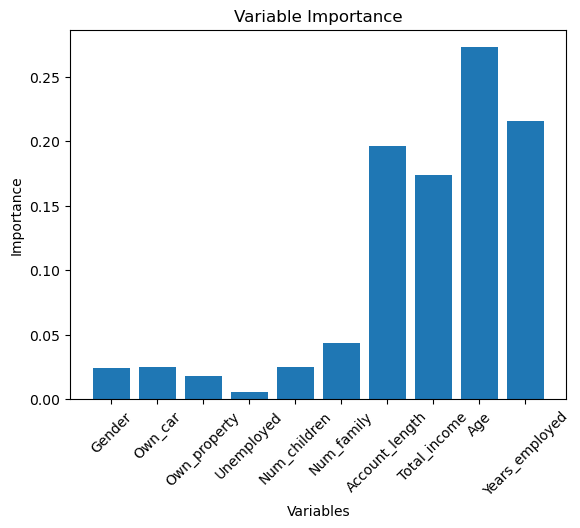

In [24]:
# Get the variable importance
importance = rf.feature_importances_

# Print the variable importance
for i, feature in enumerate(features.columns):
    print(f"{feature}: {importance[i]}")

# Create a dictionary with the variable importance data
importance_data = {feature: importance[i] for i, feature in enumerate(features.columns)}

# Create figure and axis objects
fig, ax = plt.subplots()

# Create bar plot
ax.bar(importance_data.keys(), importance_data.values())

# Set labels and title
ax.set_xlabel('Variables')
ax.set_ylabel('Importance')
ax.set_title('Variable Importance')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Compute the classification report
predictions = rf.predict(X_test)
cr = classification_report(y_test, predictions, output_dict=True)
class_report = pd.DataFrame(cr).transpose()


#### XGBoost Regression for Customer Segmentation

XGBoost (Extreme Gradient Boosting) is a machine learning algorithm that belongs to the family of gradient boosting methods. It is specifically designed to handle complex predictive modeling tasks, such as credit approval segmentation, where accurate predictions are crucial.

The same features as the ones used for Random Forest were selected, however the training and testing split were changed to 80 - 20%. The training and testing data were converted to the DMatrix format, which is the required input format for XGBoost.

A dictionary (params) is defined to set various parameters for the XGBoost model, such as the objective (regression), evaluation metric (root mean squared error), learning rate (eta), maximum tree depth (max_depth), subsample ratio (subsample), and subsample ratio of columns (colsample_bytree).The XGBoost model is trained using the xgb.train function, which takes the parameters, training data, and the number of rounds (epochs) as input.

Model evaluation: The output shows the confusion matrix, and RMSE score of 0.38, and accuracy score of 0.85. Overall not an improvement over the Random Forest model.

[14:29:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Confusion Matrix:
[[4201    4]
 [ 650    0]]
Root Mean Squared Error: 0.3670238250530061
Accuracy: 0.8652935118434604


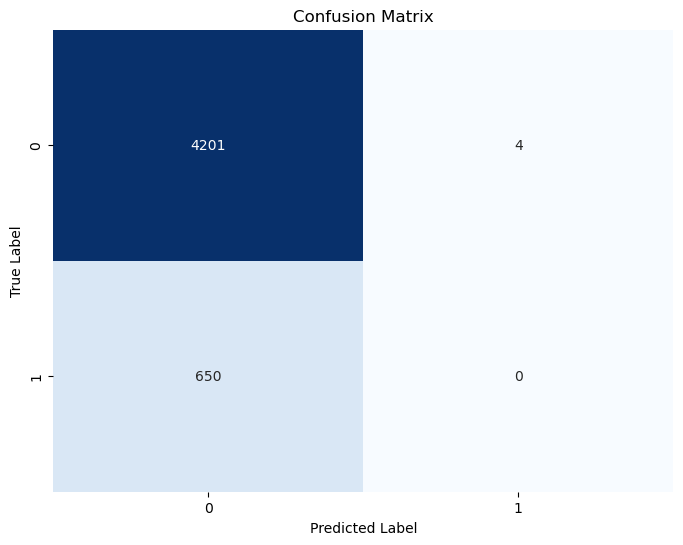

In [28]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

df = pd.DataFrame(seg)

# Select the features and target variable
features = df.drop('Target', axis=1)
target = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.5, random_state=42)

# Convert data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for XGBoost
params = {
    'objective': 'reg:linear',  # Use 'reg:linear' for regression task
    'eval_metric': 'rmse',  # Root Mean Squared Error as the evaluation metric
    'eta': 0.1,  # Learning rate
    'max_depth': 3,  # Maximum tree depth
    'subsample': 0.8,  # Subsample ratio of the training instances
    'colsample_bytree': 0.8  # Subsample ratio of columns when constructing each tree
}

# Train the model
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test set
predictions = model.predict(dtest)

# Convert predictions to class labels
predictions = [round(p) for p in predictions]

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Compute accuracy score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#### K-means Clustering 

K-means clustering can be useful in the context of customer segmentation and credit risk by enabling the identification of distinct groups or clusters within a customer population. K-means clustering can help identify groups of customers with similar characteristics, such as demographics, behavior, purchasing habits, or credit behavior. By clustering customers based on these attributes, financial institutions can gain insights into different customer segments and tailor their marketing, product offerings, and credit risk assessment strategies to each segment's specific needs and risk profiles.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from numpy.random import seed
plt.style.use('fivethirtyeight')

The KneeLocator was used to identify the "knee" or "elbow" point in a curve, which represents a sudden change in slope or curvature. It is commonly used in K-means machine learning model to determine the optimal number of clusters or the appropriate value for a hyperparameter.

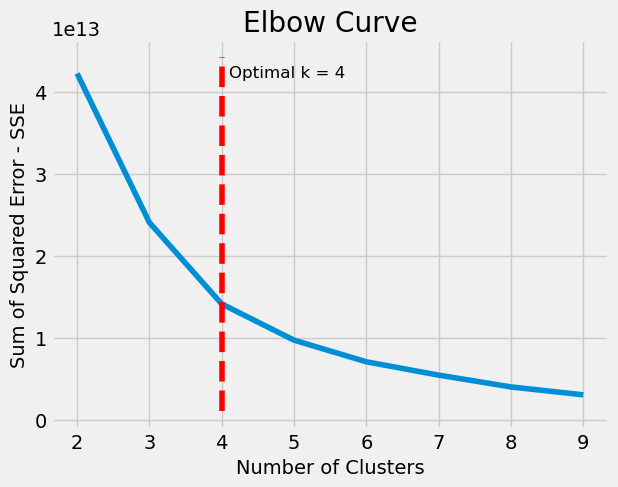

The optimal number of clusters is: 4


In [30]:
from kneed import KneeLocator

X = df[["Gender","Own_car","Own_property",'Unemployed','Num_children','Num_family','Account_length',
                   "Total_income",'Age','Years_employed']].values
inertia_list = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k,n_init=10)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)

# Finding the optimal number of clusters
kn = KneeLocator(range(2, 10), inertia_list, curve='convex', direction='decreasing')
optimal_k = kn.knee

# Plotting the elbow curve
plt.plot(range(2, 10), inertia_list)
plt.title("Elbow Curve")
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error - SSE')
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red')
plt.text(optimal_k+0.1, plt.ylim()[1]*0.9, 'Optimal k = %d' % optimal_k, fontsize=12)
plt.show()

print("The optimal number of clusters is:", optimal_k)

Below the k-means model was run using 4 optimal-k or number or clusters. The Calinski-Harabasz score evaluates the ratio of between-cluster dispersion to within-cluster dispersion. A higher score indicates better-defined and more separated clusters. The score of 18624.395 suggests that the clusters are well-separated and distinct, contributing to a good clustering solution.

In [38]:
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Suppress warnings
warnings.filterwarnings("ignore")

# Select the features for clustering
features = df[["Gender", "Own_car", "Own_property", "Unemployed", "Num_children", "Num_family", "Account_length",
               "Total_income", "Age", "Years_employed"]]

# Perform k-means clustering
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(features)

# Add the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Evaluate clustering performance
calinski_harabasz = calinski_harabasz_score(features, kmeans.labels_)

print("Clustering Performance Measures:")
print("Calinski-Harabasz Score:", calinski_harabasz)

Clustering Performance Measures:
Calinski-Harabasz Score: 18624.395073605763


The plots below illustrate the distinct groups identified through the implementation of a k-means clustering model. The visualizations depict the relationship between Total Income and Age, as well as Total Income and Years Employed.

By reintroducing the cluster labels into the dataset, creditors gain the ability to identify the customers belonging to each specific group. This information can be utilized to optimize risk assessments tailored to the characteristics of each group.

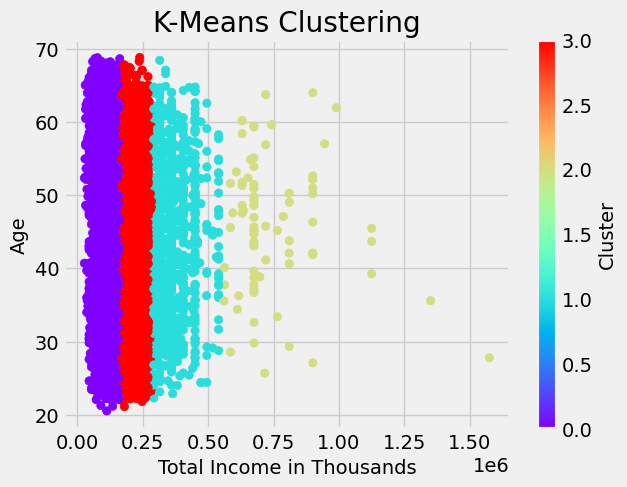

In [44]:
# Plot the data points colored by cluster labels
plt.scatter(df['Total_income'], df['Age'], c=df['Cluster'], cmap='rainbow')
plt.xlabel('Total Income in Thousands')
plt.ylabel('Age')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()

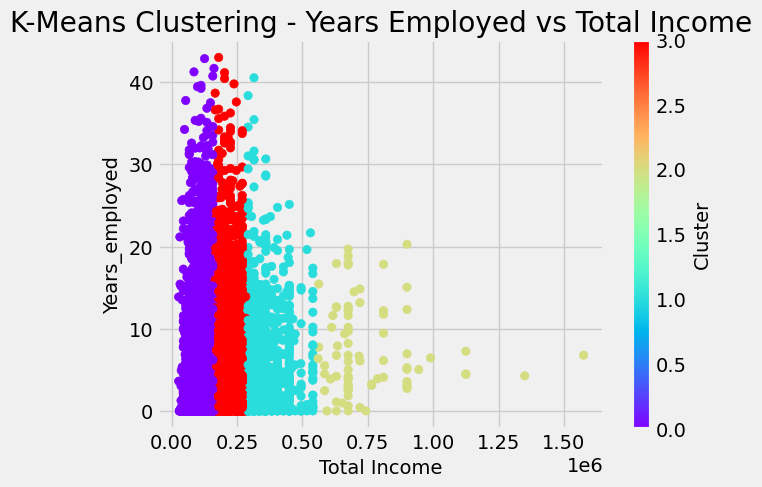

In [43]:
# Plot the data points colored by cluster labels
plt.scatter(df['Total_income'], df['Years_employed'], c=df['Cluster'], cmap='rainbow')
plt.xlabel('Total Income')
plt.ylabel('Years_employed')
plt.title('K-Means Clustering - Years Employed vs Total Income')
plt.colorbar(label='Cluster')
plt.show()

### K-means Classification Based on Credit Behavior

In the context of credit behavior and purchasing/payment behaviors, the k-means clustering algorithm can be applied to segment customers based on their financial attributes. The dataset used for this analysis includes various features related to customers' credit and purchasing behaviors, such as balance, purchase amounts, cash advances, and payment patterns.

K-means clustering aims to group similar data points together based on their feature similarities. In this case, the algorithm was used to identify distinct clusters of customers with similar credit and purchasing patterns. By analyzing these clusters, creditors can gain valuable insights into different customer segments and tailor their strategies accordingly.

Customers who exhibit different spending behaviors, customers who frequently make purchases, and customers who rely more on cash advances or have minimal purchase activity are some of the behaviors that can provide creditors with insight to further improve the customization of lending practices. The same applies to groups of customers with varying payment patterns, such as those who consistently make full payments versus those who make minimum payments.

By understanding these distinct customer segments, creditors can optimize their risk assessments, customize marketing strategies, and develop targeted approaches for each cluster. For instance, they can offer personalized credit limits, specific promotions, or tailored payment plans to better suit the preferences and needs of each customer group.

#### Data Exploration

The data set used for this analysis has 8950 rows and 19 variables. NAN values were filled with zeros and but no other tranformations or enrichments were necessary. The features selected were: 

'BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE',        'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY',        'CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS', AND'PRC_FULL_PAYMENT'.

In [2]:
cluster = pd.read_csv('CC_clustering.csv')
cluster.fillna(0, inplace = True)
cluster.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [3]:
cluster.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


Following are visualizations of the distribution of balances, credit limit, purchases and cash advancements. The average credit limit is of about 4500.00, and the average balance is of about 1500.00 

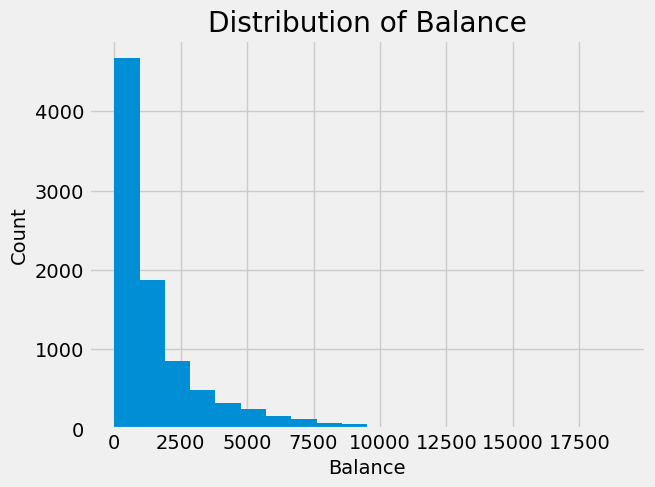

The average customer balance is: 1564.47


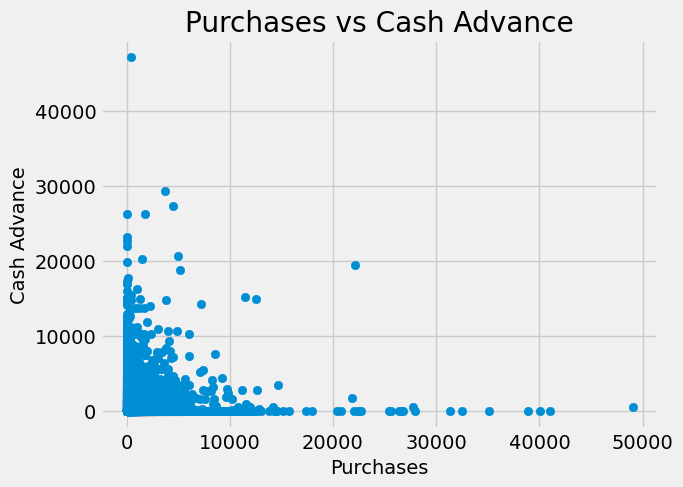

The average customer purchase amount is: 1003.20
The average customer cash advance amount is: 978.87


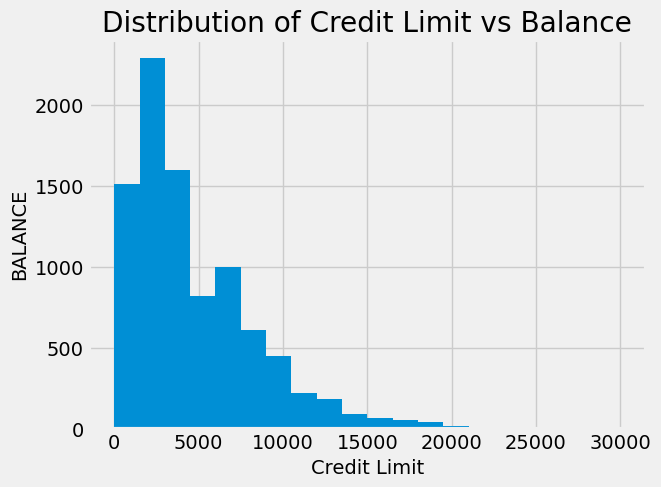

The average customer credit limit is: 4493.95
The average customer balance is: 1564.47


In [4]:
plt.hist(cluster['BALANCE'], bins=20)
plt.xlabel('Balance')
plt.ylabel('Count')
plt.title('Distribution of Balance')
plt.show()

print("The average customer balance is: {:.2f}".format(cluster['BALANCE'].mean()))

plt.scatter(cluster['PURCHASES'], cluster['CASH_ADVANCE'])
plt.xlabel('Purchases')
plt.ylabel('Cash Advance')
plt.title('Purchases vs Cash Advance')
plt.show()

print("The average customer purchase amount is: {:.2f}".format(cluster['PURCHASES'].mean()))

print("The average customer cash advance amount is: {:.2f}".format(cluster['CASH_ADVANCE'].mean()))

plt.hist(cluster['CREDIT_LIMIT'], bins=20)
plt.xlabel('Credit Limit')
plt.ylabel('BALANCE')
plt.title('Distribution of Credit Limit vs Balance')
plt.show()

print("The average customer credit limit is: {:.2f}".format(cluster['CREDIT_LIMIT'].mean()))
print("The average customer balance is: {:.2f}".format(cluster['BALANCE'].mean()))

Using kneelocator/elbow method to find ideal number of clusters prior to running k-means classification:

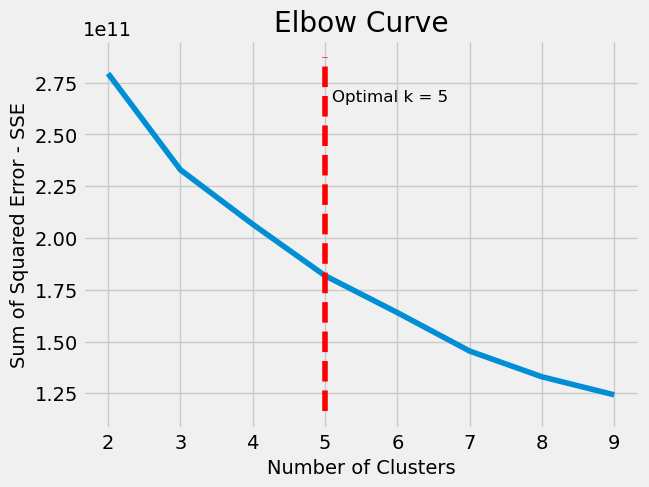

The optimal number of clusters is: 5


In [60]:
from kneed import KneeLocator

X = cluster[[ALA'BNCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE',
        'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY',
        'CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT']].values
inertia_list = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k,n_init=10)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)

# Finding the optimal number of clusters
kn = KneeLocator(range(2, 10), inertia_list, curve='convex', direction='decreasing')
optimal_k = kn.knee

# Plotting the elbow curve
plt.plot(range(2, 10), inertia_list)
plt.title("Elbow Curve")
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error - SSE')
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red')
plt.text(optimal_k+0.1, plt.ylim()[1]*0.9, 'Optimal k = %d' % optimal_k, fontsize=12)
plt.show()

print("The optimal number of clusters is:", optimal_k)

Running K-means classifier with 5 clusters: 

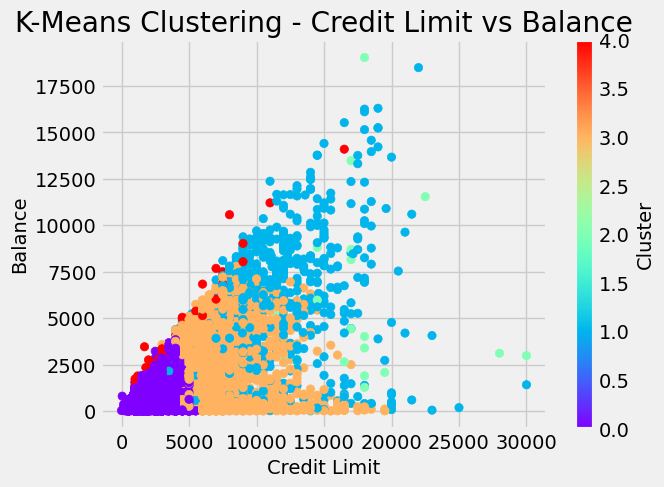

In [70]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Select the features for clustering
features = cluster[['BALANCE','MINIMUM_PAYMENTS','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE',
        'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY',
        'CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT']].values

# Perform k-means clustering
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(features)

# Add the cluster labels to the original DataFrame
cluster['Cluster'] = kmeans.labels_

# Plot the data points colored by cluster labels
plt.scatter(cluster['CREDIT_LIMIT'], cluster['BALANCE'], c=cluster['Cluster'], cmap='rainbow')
plt.xlabel('Credit Limit')
plt.ylabel('Balance')
plt.title('K-Means Clustering - Credit Limit vs Balance')
plt.colorbar(label='Cluster')
plt.show()

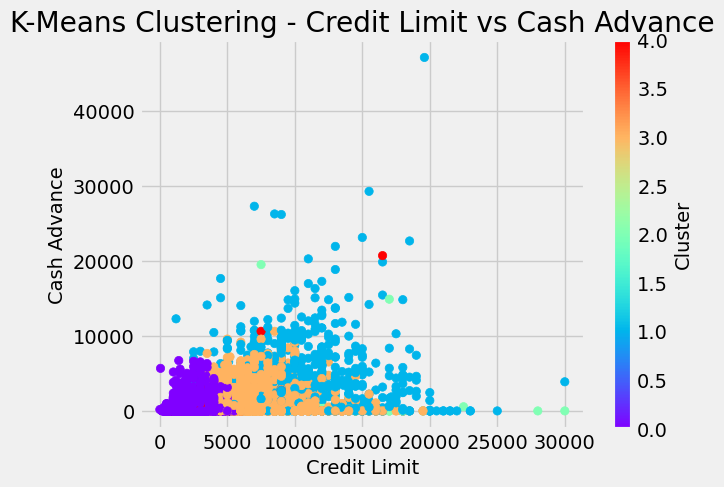

In [68]:

# Plot the data points colored by cluster labels
plt.scatter(cluster['CREDIT_LIMIT'], cluster['CASH_ADVANCE'], c=cluster['Cluster'], cmap='rainbow')
plt.xlabel('Credit Limit')
plt.ylabel('Cash Advance')
plt.title('K-Means Clustering - Credit Limit vs Cash Advance')
plt.colorbar(label='Cluster')
plt.show()

The below plots show that there are 2 larger cluster followed by 1 medium and 2 much smaller ones. 

With this information at hand, creditors can leverage the unique label total counts to gain insights into the distribution of customers among the clusters. These insights can be utilized to make additional optimizations in lending practices, thereby reducing risk and enhancing overall customer experiences.

In [73]:
# Calculate the counts of each unique label
unique_label_counts = cluster['Cluster'].value_counts()

# Print the unique label total counts
for label, count in unique_label_counts.items():
    print("Cluster", label, ":", count)

Cluster 0 : 5659
Cluster 3 : 2563
Cluster 1 : 646
Cluster 4 : 58
Cluster 2 : 24


### Customer Classification based on Default Risk

Predicting default vs no default using classification models can significantly aid in credit assessment optimization. Here are some examples of how risk of default classification can be used to improve credit practices:

Risk Assessment: Classification models can accurately classify customers into default and non-default groups based on historical data and relevant features. By identifying customers at a higher risk of defaulting on their credit obligations, lenders can allocate resources more efficiently and make informed decisions regarding credit approval or credit limit adjustments.

Portfolio Management: Predicting default enables lenders to assess and manage the risk associated with their entire portfolio. By understanding the distribution of default risk within the portfolio, lenders can optimize their portfolio allocation, diversify risk, and identify areas that require additional attention or mitigation strategies.

Early Intervention: Classification models can flag customers who are more likely to default in the future, allowing lenders to intervene early. Early intervention can include offering financial counseling, restructuring payment plans, or providing targeted support, which may help prevent defaults and improve customer relationships.

Pricing and Terms: Predicting default risk allows lenders to adjust pricing and terms to reflect the level of risk associated with individual borrowers. Higher-risk borrowers may face higher interest rates or stricter terms, ensuring that lenders are appropriately compensated for the additional risk they undertake.

#### Data Exploration

In [30]:
default = pd.read_csv("default_credit card.csv")
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [32]:
default.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


##### Variable Description:

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1= pay duly, 1=payment delay for one month, 2=payment delay for two months, 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

Below is a series of exploratory visualizations of the default risk data set. The majority of the customers are ages 21 to 41 according the box plot chart. The bulk of credit limit ranges from 24 to 25 thousand. The correlation heat map is showing strong correlations among the payment and bill variables, which is not surprising. There is also some correlation between age and balance limit.

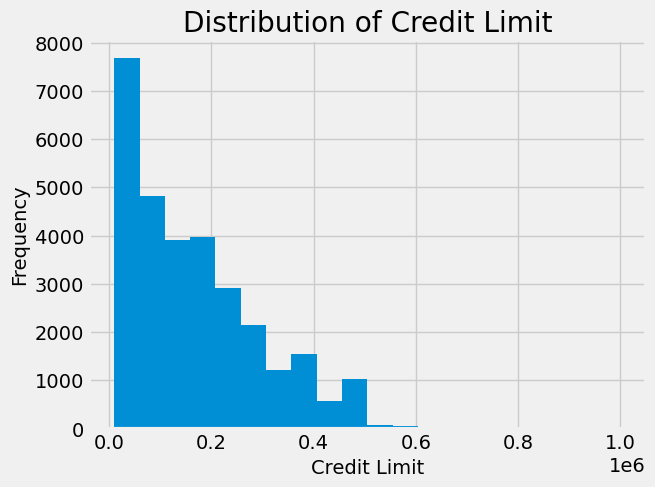

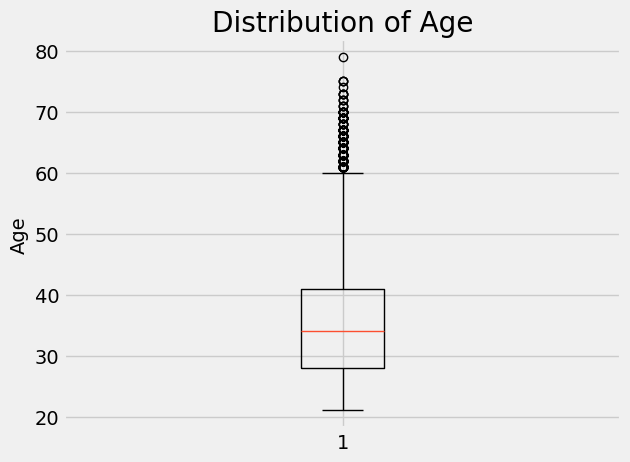

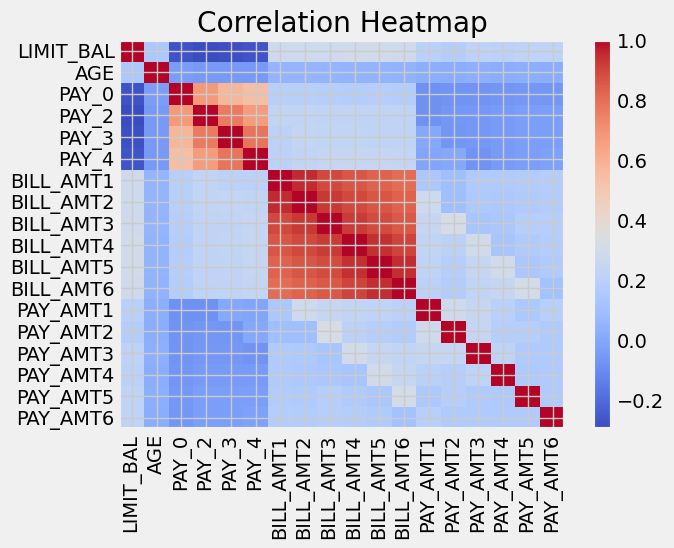

            LIMIT_BAL           AGE       PAY_AMT1
count    30000.000000  30000.000000   30000.000000
mean    167484.322667     35.485500    5663.580500
std     129747.661567      9.217904   16563.280354
min      10000.000000     21.000000       0.000000
25%      50000.000000     28.000000    1000.000000
50%     140000.000000     34.000000    2100.000000
75%     240000.000000     41.000000    5006.000000
max    1000000.000000     79.000000  873552.000000
Default Payment Ratio: 0.2212


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the sample data into a DataFrame
df = default

# Histogram for 'LIMIT_BAL'
plt.hist(df['LIMIT_BAL'], bins=20)
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Limit')
plt.show()

# Box plot for 'AGE'
plt.boxplot(df['AGE'])
plt.ylabel('Age')
plt.title('Distribution of Age')
plt.show()

# Correlation Heatmap
corr_matrix = df[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'BILL_AMT1',
                  'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                  'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
                  'PAY_AMT5', 'PAY_AMT6']].corr()

plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()

# Summary statistics
summary_stats = df[['LIMIT_BAL', 'AGE', 'PAY_AMT1']].describe()
print(summary_stats)

# Default payment ratio
default_ratio = df['default payment next month'].mean()
print("Default Payment Ratio:", default_ratio)


In [33]:
default = default.rename(columns={'default payment next month': 'Target'})

XGboost with train- test split of 80 - 20  produced a Root Mean Squared Error: 0.4224926034855522 and Accuracy: 0.8215. This is likelly due to the data being unbalanced for positive cases of default. This type of data set is almost always unbalanced and some techniques can be applied to try to compensate for the difference between positive vs negative defaut cases. 

Confusion Matrix:
[[4464  223]
 [ 848  465]]
Root Mean Squared Error: 0.4224926034855522
Accuracy: 0.8215


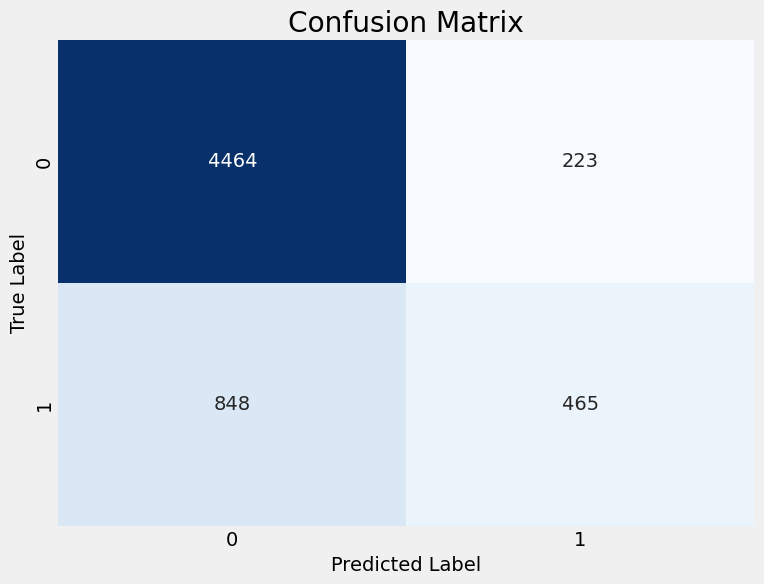

In [25]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.DataFrame(default)

# Select the features and target variable
features = df.drop(['Target'], axis=1)  # Exclude the customer ID column
target = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Convert data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for XGBoost
params = {
    'objective': 'binary:logistic',  # Use 'reg:linear' for regression task
    'eval_metric': 'rmse',  # Root Mean Squared Error as the evaluation metric
    'eta': 0.1,  # Learning rate
    'max_depth': 3,  # Maximum tree depth
    'subsample': 0.8,  # Subsample ratio of the training instances
    'colsample_bytree': 0.8  # Subsample ratio of columns when constructing each tree
}

# Train the model
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test set
predictions = model.predict(dtest)

# Convert predictions to class labels
predictions = [round(p) for p in predictions]

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Compute accuracy score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


The XGboost with tweaked parameters to attempt to address the unbalanced data issue was run. 
The results did improve however, which could mean that other methods could be used such adding complementary features which might help the model better capture the patterns and improve its performance.

[0]	train-auc:0.73430	valid-auc:0.72455
[50]	train-auc:0.79248	valid-auc:0.77969
[100]	train-auc:0.80539	valid-auc:0.78283
[150]	train-auc:0.81505	valid-auc:0.78319
[200]	train-auc:0.82304	valid-auc:0.78310
[244]	train-auc:0.82987	valid-auc:0.78280
Confusion Matrix:
[[4453  234]
 [ 843  470]]
Accuracy: 0.8205


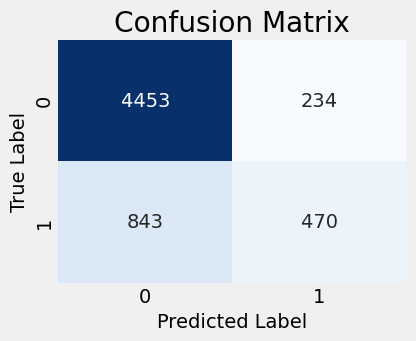

In [29]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(default)

# Select the features and target variable
features = df.drop(['Target'], axis=1)  # Exclude the customer ID column
target = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Convert data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for XGBoost
params = {
    'objective': 'binary:logistic',  # Use 'reg:linear' for regression task
    'eval_metric': 'auc',  # AUC as the evaluation metric
    'eta': 0.1,  # Learning rate
    'max_depth': 3,  # Maximum tree depth
    'subsample': 0.8,  # Subsample ratio of the training instances
    'colsample_bytree': 0.8  # Subsample ratio of columns when constructing each tree
}

# Prepare the train and valid datasets
dvalid = xgb.DMatrix(X_test, label=y_test)

# Define the watchlist for monitoring the train and validation sets
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Train the model with early stopping
MAX_ROUNDS = 1000  # Maximum number of boosting rounds
EARLY_STOP = 50  # Early stopping rounds
VERBOSE_EVAL = 50  # Evaluation metric print frequency

model = xgb.train(params,
                  dtrain,
                  MAX_ROUNDS,
                  watchlist,
                  early_stopping_rounds=EARLY_STOP,
                  maximize=True,
                  verbose_eval=VERBOSE_EVAL)

# Make predictions on the test set
predictions = model.predict(dtest)

# Convert probabilities to class labels
predictions = [1 if p > 0.5 else 0 for p in predictions]

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Compute accuracy score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Next Random Forest with variable importance scores and visualization was performed. The Root Mean Squared Error: 0.4236744032862972 and Accuracy: 0.8205 reported indicate the model performs relatively well given the challenging data set. The most important variables reported were AGE and PAY_0 - which corresponds to the number of months the payment was delayed.

Root Mean Squared Error: 0.43454957523087434
Accuracy: 0.8111666666666667
ID: 0.07186922039537061
LIMIT_BAL: 0.05116156352203868
SEX: 0.01059532989237687
EDUCATION: 0.018978490745270537
MARRIAGE: 0.01286346506123054
AGE: 0.055966759259145266
PAY_0: 0.09699640947588974
PAY_2: 0.0383244153064068
PAY_3: 0.030600411989860778
PAY_4: 0.02650464044848955
PAY_5: 0.018874383794411975
PAY_6: 0.017656920560037495
BILL_AMT1: 0.054479326449763985
BILL_AMT2: 0.049989795085177244
BILL_AMT3: 0.04794901634518912
BILL_AMT4: 0.04710552120257134
BILL_AMT5: 0.04654952490684817
BILL_AMT6: 0.04653163679793955
PAY_AMT1: 0.04866726394689709
PAY_AMT2: 0.04288169159408965
PAY_AMT3: 0.04231897495566698
PAY_AMT4: 0.04103809482083525
PAY_AMT5: 0.04042445289817948
PAY_AMT6: 0.04167269054631337


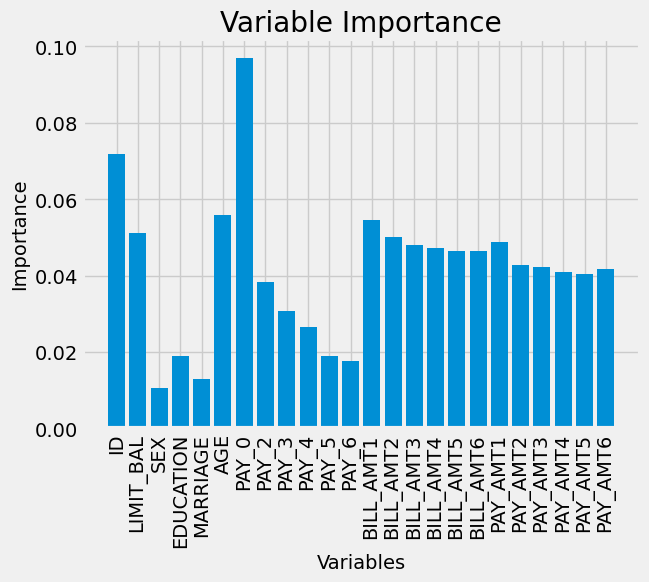

Confusion Matrix:
[[4306  381]
 [ 752  561]]


In [32]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt


# Create DataFrame
df = pd.DataFrame(default)

# Select the features and target variable
features = df.drop('Target', axis=1)
target = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the random forest model
rf = RandomForestClassifier()

# Fit the model on the training data
rf.fit(X_train, y_train)


# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Compute accuracy score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Get the variable importance
importance = rf.feature_importances_

# Print the variable importance
for i, feature in enumerate(features.columns):
    print(f"{feature}: {importance[i]}")

# Create a dictionary with the variable importance data
importance_data = {feature: importance[i] for i, feature in enumerate(features.columns)}

# Create figure and axis objects
fig, ax = plt.subplots()

# Create bar plot
ax.bar(importance_data.keys(), importance_data.values())

# Set labels and title
ax.set_xlabel('Variables')
ax.set_ylabel('Importance')
ax.set_title('Variable Importance')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Compute the classification report
predictions = rf.predict(X_test)
cr = classification_report(y_test, predictions, output_dict=True)
class_report = pd.DataFrame(cr).transpose()

One final attmept to address the unbalance data issue was done by adding the RandomOverSampler technique. After splitting the data into training and testing sets, the minority class is oversampled using fit_resample() from the RandomOverSampler object, as suggested earlier. The data is converted for Random Forest for both the resampled training data (X_train_resampled, y_train_resampled) and the testing data (X_test, y_test).Surprisingly the accuracy did not improve, which could mean that further parameter exploration is necessary.

Class imbalance severity is most likelly the reason for the lack of improvement. If the class imbalance is extremely skewed or the minority class is highly underrepresented, it can pose a significant challenge for the model to learn patterns effectively. In such cases, alternative techniques like anomaly detection, one-class classification, or leveraging domain knowledge might be required.

Confusion Matrix:
[[4306  381]
 [ 752  561]]
Accuracy: 0.8111666666666667


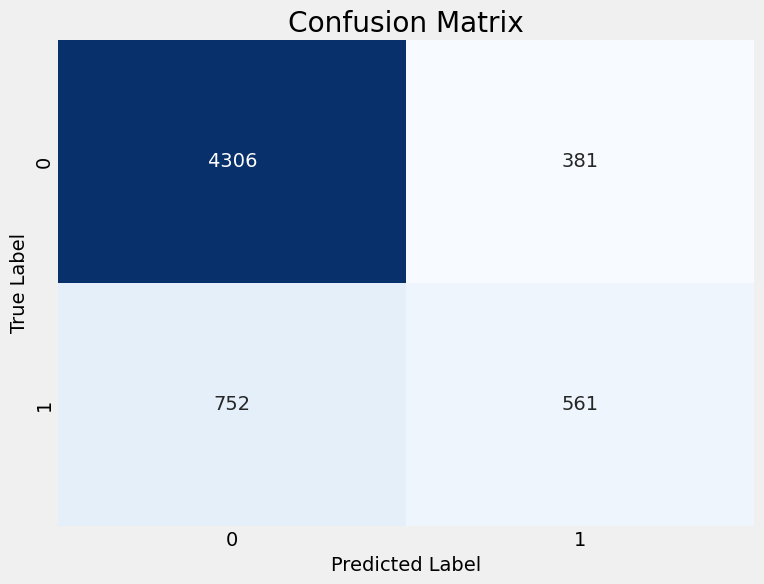

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

df = pd.DataFrame(default)

# Select the features and target variable
features = df.drop(['Target'], axis=1)  # Exclude the customer ID column
target = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the resampled data
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
predictions = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### Fraud Detection Analysis

There are numerous reasons why creditors are interested in fraud detection. Detecting and preventing fraud helps minimize financial losses. Fraud cases can damage a creditor's reputation and erode customer trust. By actively detecting and addressing fraud, creditors demonstrate their commitment to maintaining a secure and trustworthy financial environment, which enhances their reputation among customers and stakeholders.  Fraud can introduce additional risks to a creditor's lending portfolio. Fraudulent borrowers may default on loans or engage in other risky behaviors, leading to increased credit risk. By detecting and addressing fraud, creditors can mitigate these risks and maintain a healthier portfolio.

Financial institutions are subject to various regulations related to fraud prevention and detection. Non-compliance can lead to legal consequences and reputational damage. By prioritizing fraud detection, creditors ensure compliance with regulatory requirements and safeguard themselves from potential penalties. Overall, fraud detection is an integral part of credit risk assessment for creditors, as it helps protect their financial interests, maintain their reputation, comply with regulations, mitigate risks, enhance customer experience, and improve operational efficiency.


#### Data Exploration and Cleaning


This dataset contains credit card transactions made legitimately or fraudulently, and all metadata associated with those transactions, like when and where they occurred, for what purpose, the account information, etc. It contains 10000 transactions, and 23 columns. The columns were as follows:

'unnamed', 'transdatetime', 'ccnum', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'citypop', 'job', 'dob', 'trans_num', 'unixtime', 'merch_lat', 'merch_long', and 'is_fraud'.

The primary objective with this dataset was to determine if there were variables that could be used to predict a fraudulent charge. Correlation analysis and a Random Forest algorithm were used to determine important variables. A time series analysis was conducted to determine if fraudulent purchases were more common at a particular time.

In [2]:
# import packages 
import pandas as pd     # data frame operations
import numpy as np      # arrays and math functions
import matplotlib.pyplot as plt    #2D plotting
import seaborn as sns   # pretty pretty graphs
from sklearn.tree import DecisionTreeClassifier, plot_tree
from datetime import datetime, date
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

In [13]:
# Read in dataset
cc = pd.read_csv("ccfraud1.csv", parse_dates=[1], infer_datetime_format=True)
temp = pd.DatetimeIndex(cc['trans_date_trans_time'])
cc['trans_date']=temp.date
cc['trans_time']=temp.time
del cc['trans_date_trans_time']

cc.head(3)

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,261604,5.359540e+15,fraud_Mosciski Group,travel,8517.38,Michael,Francis,M,1833 Jeanette Stravenue,Belgrade,...,18182,"Engineer, drilling",29-06-1975,e5b4abde3491493d1d9897b24cba9c58,1380145007,45.534538,-111.433653,0,2020-09-25,21:36:00
1,375959,3.513620e+15,fraud_Dooley-Thompson,misc_net,187.99,Amber,Perez,F,954 Reyes Ways,Fulton,...,355,Financial adviser,26-06-1955,23eeeb38d1016ec5d1f68437fb111321,1384491501,44.691168,-97.995122,0,2020-11-15,04:58:00
2,372597,3.023540e+13,fraud_Roberts-Beahan,misc_pos,7.81,James,Baldwin,M,3603 Mitchell Court,Winfield,...,5512,Exhibition designer,24-03-1980,bd72062b703de9aa426c7e73f13ec98e,1384344918,39.201981,-82.561837,0,2020-11-13,12:15:00


In [8]:
cc.dtypes
# lots of objects, will need to separate out complex columns
# drop unnamed, unix_time
# objects: cc_num, merchant*, category*, first, last,
#     street, city, state, zip*, lat, long, job*,
#     trans_num, merch_lat, merch_long
# num: amt*, gender(1/0), city_pop*, age[derived]
# datetime: dob*, trans_date*, trans_time*
# Target: is_fraud
# * = variables that might matter

Unnamed: 0      int64
cc_num        float64
merchant       object
category       object
amt           float64
first          object
last           object
gender         object
street         object
city           object
state          object
zip             int64
lat           float64
long          float64
city_pop        int64
job            object
dob            object
trans_num      object
unix_time       int64
merch_lat     float64
merch_long    float64
is_fraud        int64
trans_date     object
trans_time     object
dtype: object

The columns'trans_date_trans_time','trans_date', 'transtime', and 'dob' were changed into datetime formats. The prefix "fraud" was dropped from the merchant column. The gender and age columns were also transformed into numerical values that could be used by the models.

In [9]:
#drop [Unnamed],  [Unix_time] - I just don't know how to use it
cc1 = cc.drop(['Unnamed: 0','unix_time'],axis=1)

# fix [merchant] column
cc1['merchant'] = cc1['merchant'].str.replace('fraud_','')
cc1.head(3)

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,5.359540e+15,Mosciski Group,travel,8517.38,Michael,Francis,M,1833 Jeanette Stravenue,Belgrade,MT,...,-111.1439,18182,"Engineer, drilling",29-06-1975,e5b4abde3491493d1d9897b24cba9c58,45.534538,-111.433653,0,2020-09-25,21:36:00
1,3.513620e+15,Dooley-Thompson,misc_net,187.99,Amber,Perez,F,954 Reyes Ways,Fulton,SD,...,-97.8712,355,Financial adviser,26-06-1955,23eeeb38d1016ec5d1f68437fb111321,44.691168,-97.995122,0,2020-11-15,04:58:00
2,3.023540e+13,Roberts-Beahan,misc_pos,7.81,James,Baldwin,M,3603 Mitchell Court,Winfield,WV,...,-81.8900,5512,Exhibition designer,24-03-1980,bd72062b703de9aa426c7e73f13ec98e,39.201981,-82.561837,0,2020-11-13,12:15:00


In [14]:
 #add [Age]
def age(born):
    born = datetime.strptime(born, '%Y-%m-%d').date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  
cc1['Age'] = cc1['dob2'].apply(age)
  
cc1.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,job,dob,trans_num,merch_lat,merch_long,is_fraud,trans_date,trans_time,dob2,Age
0,5.359540e+15,Mosciski Group,travel,8517.38,Michael,Francis,M,1833 Jeanette Stravenue,Belgrade,MT,...,"Engineer, drilling",29-06-1975,e5b4abde3491493d1d9897b24cba9c58,45.534538,-111.433653,0,2020-09-25,21:36:00,1975-06-29,47
1,3.513620e+15,Dooley-Thompson,misc_net,187.99,Amber,Perez,F,954 Reyes Ways,Fulton,SD,...,Financial adviser,26-06-1955,23eeeb38d1016ec5d1f68437fb111321,44.691168,-97.995122,0,2020-11-15,04:58:00,1955-06-26,67
2,3.023540e+13,Roberts-Beahan,misc_pos,7.81,James,Baldwin,M,3603 Mitchell Court,Winfield,WV,...,Exhibition designer,24-03-1980,bd72062b703de9aa426c7e73f13ec98e,39.201981,-82.561837,0,2020-11-13,12:15:00,1980-03-24,43
3,6.011100e+15,Kunze Inc,grocery_pos,122.29,Valerie,Davis,F,3861 Anderson Ramp Apt. 536,Drakes Branch,VA,...,Energy engineer,02-09-1985,d3103041c5cdafbd7d524696f0c9d14c,37.252716,-78.808775,0,2020-06-29,08:55:00,1985-09-02,37
4,3.537800e+15,"Greenholt, O'Hara and Balistreri",shopping_net,9.21,Christie,Mendoza,F,53142 Katrina Roads Suite 889,Monitor,WA,...,Medical technical officer,20-03-1969,4bbce2b5e7be7af611c5da55ca50f691,46.970765,-119.542727,0,2020-07-18,06:56:00,1969-03-20,54


In [15]:
# fix [dob]
def date_convert(date_to_convert):
    return str(datetime.strptime(date_to_convert, '%d-%m-%Y').date())

cc1['dob2'] = cc1['dob'].apply(date_convert)

# add [Age]
cc1['Age'] = cc1['dob2'].apply(age)

cc1.head(3)

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,job,dob,trans_num,merch_lat,merch_long,is_fraud,trans_date,trans_time,dob2,Age
0,5.359540e+15,Mosciski Group,travel,8517.38,Michael,Francis,M,1833 Jeanette Stravenue,Belgrade,MT,...,"Engineer, drilling",29-06-1975,e5b4abde3491493d1d9897b24cba9c58,45.534538,-111.433653,0,2020-09-25,21:36:00,1975-06-29,47
1,3.513620e+15,Dooley-Thompson,misc_net,187.99,Amber,Perez,F,954 Reyes Ways,Fulton,SD,...,Financial adviser,26-06-1955,23eeeb38d1016ec5d1f68437fb111321,44.691168,-97.995122,0,2020-11-15,04:58:00,1955-06-26,67
2,3.023540e+13,Roberts-Beahan,misc_pos,7.81,James,Baldwin,M,3603 Mitchell Court,Winfield,WV,...,Exhibition designer,24-03-1980,bd72062b703de9aa426c7e73f13ec98e,39.201981,-82.561837,0,2020-11-13,12:15:00,1980-03-24,43


In [16]:
print("Mean Age: ", cc1['Age'].mean())
print("Min Age: ", cc1['Age'].min())
print("Max Age: ", cc1['Age'].max())

Mean Age:  48.9678
Min Age:  18
Max Age:  98


In [12]:
cc1.dtypes
# looking at dob, dob2, Age
# still need to convert trans_date, trans_time

cc_num        float64
merchant       object
category       object
amt           float64
first          object
last           object
gender         object
street         object
city           object
state          object
zip             int64
lat           float64
long          float64
city_pop        int64
job            object
dob            object
trans_num      object
merch_lat     float64
merch_long    float64
is_fraud        int64
trans_date     object
trans_time     object
dob2           object
Age             int64
dtype: object

In [13]:
# fix [trans_date]
def datCnv(src):
    return pd.to_datetime(src)

cc1['trans_date'] = cc1.trans_date.apply(datCnv)
cc1.dtypes

cc_num               float64
merchant              object
category              object
amt                  float64
first                 object
last                  object
gender                object
street                object
city                  object
state                 object
zip                    int64
lat                  float64
long                 float64
city_pop               int64
job                   object
dob                   object
trans_num             object
merch_lat            float64
merch_long           float64
is_fraud               int64
trans_date    datetime64[ns]
trans_time            object
dob2                  object
Age                    int64
dtype: object

In [14]:
# ML won't convert M/F so
cc1['gender'].replace(['M','F'],['1','0'], inplace=True)
cc1.head(3)

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,job,dob,trans_num,merch_lat,merch_long,is_fraud,trans_date,trans_time,dob2,Age
0,5.359540e+15,Mosciski Group,travel,8517.38,Michael,Francis,1,1833 Jeanette Stravenue,Belgrade,MT,...,"Engineer, drilling",29-06-1975,e5b4abde3491493d1d9897b24cba9c58,45.534538,-111.433653,0,2020-09-25,21:36:00,1975-06-29,47
1,3.513620e+15,Dooley-Thompson,misc_net,187.99,Amber,Perez,0,954 Reyes Ways,Fulton,SD,...,Financial adviser,26-06-1955,23eeeb38d1016ec5d1f68437fb111321,44.691168,-97.995122,0,2020-11-15,04:58:00,1955-06-26,67
2,3.023540e+13,Roberts-Beahan,misc_pos,7.81,James,Baldwin,1,3603 Mitchell Court,Winfield,WV,...,Exhibition designer,24-03-1980,bd72062b703de9aa426c7e73f13ec98e,39.201981,-82.561837,0,2020-11-13,12:15:00,1980-03-24,43


Variables with fewer distinct values were used to see if any trends were easy to spot. Merchant and Job did not show any obvious trends as seen in the bar plots below. Most variables were ploted into the bar plots, in hopes to observe obvious correlations between fraudulent transactions and other variables.


In [15]:
# objects: cc_num, merchant*, category*, first, last,
#     street, city, state, zip*, lat, long, job*,
#     trans_num, merch_lat, merch_long
# num: amt*, gender(1/0), city_pop*, age* - later

# Categorical:  merchant, category, gender-just to check, state-stand instead of zip code, job
print("total entries of gender: ", len(cc1['gender']))
print("distinct categories of gender: ", len(set(cc1['gender'])))

total entries of gender:  10000
distinct categories of gender:  2


In [16]:
# check
print("State total: ", len(cc1['state']))
print("State distinct: ", len(set(cc1['state'])))
# good, continue

print("Merchant total: ", len(cc1['merchant']))
print("Merchant distinct: ", len(set(cc1['merchant'])))
print("Job total: ", len(cc1['job']))
print("Job distinct: ", len(set(cc1['job'])))
print("Category total: ", len(cc1['category']))
print("Category distinct: ", len(set(cc1['category'])))

State total:  10000
State distinct:  50
Merchant total:  10000
Merchant distinct:  693
Job total:  10000
Job distinct:  473
Category total:  10000
Category distinct:  14


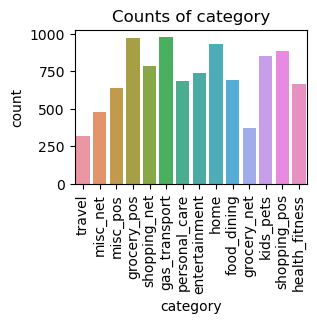

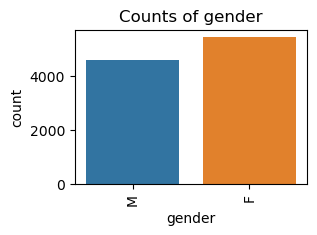

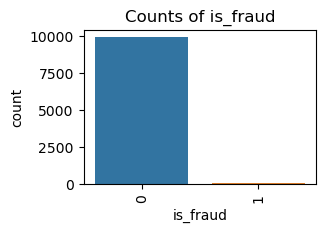

In [19]:
# Exploratory analysis can be easily done on gender and category.
# Maybe states. Too many distinct merchants and jobs.
# gender, category
categorical_vars = ['category', 'gender', 'is_fraud']
for var in categorical_vars:
    plt.figure(figsize=(3,2))
    sns.countplot(x=var, data=cc1)
    plt.xticks(rotation=90)
    plt.title(f'Counts of {var}')
    plt.show()

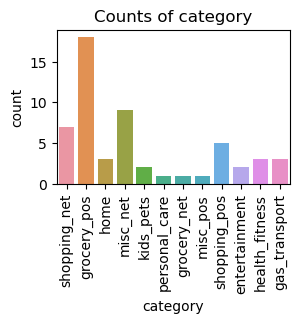

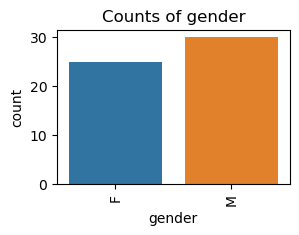

In [20]:
fraudOnly = cc1[cc1['is_fraud']==1]
# fraudOnly
fraud_comparison = ['category', 'gender']
for var in fraud_comparison:
    plt.figure(figsize=(3,2))
    sns.countplot(x=var, data=fraudOnly)
    plt.xticks(rotation=90)
    plt.title(f'Counts of {var}')
    plt.show()

Some interesting patterns emerged when looking at the bar blot of categories. Groceries and shopping are high for both kinds of transactions, but internet purchases are more likely to be fraudulent. Females complete more transactions, but males have more fraud. Ultimately though the differences aren't significant.

<Axes: xlabel='count', ylabel='category'>

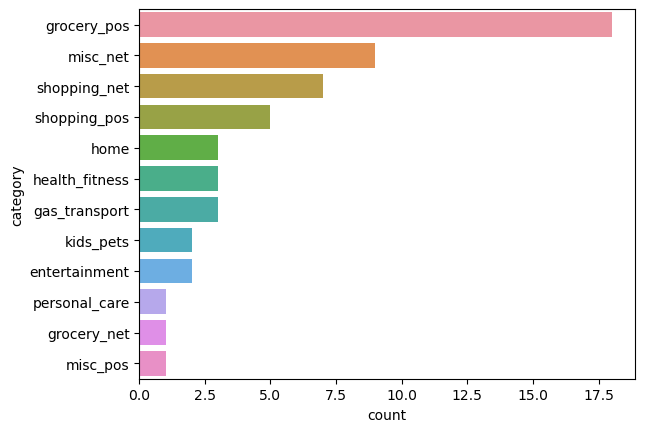

In [21]:
# close up on category
sns.countplot(data=fraudOnly, y="category", order=fraudOnly['category'].value_counts().index)

The side-by-side plots are showing all transactions vs fraudulent transactions only by State. For this data set, New York, Pennsylvania and Texas have the highes rates of fraudulent transactions.

<Axes: xlabel='count', ylabel='state'>

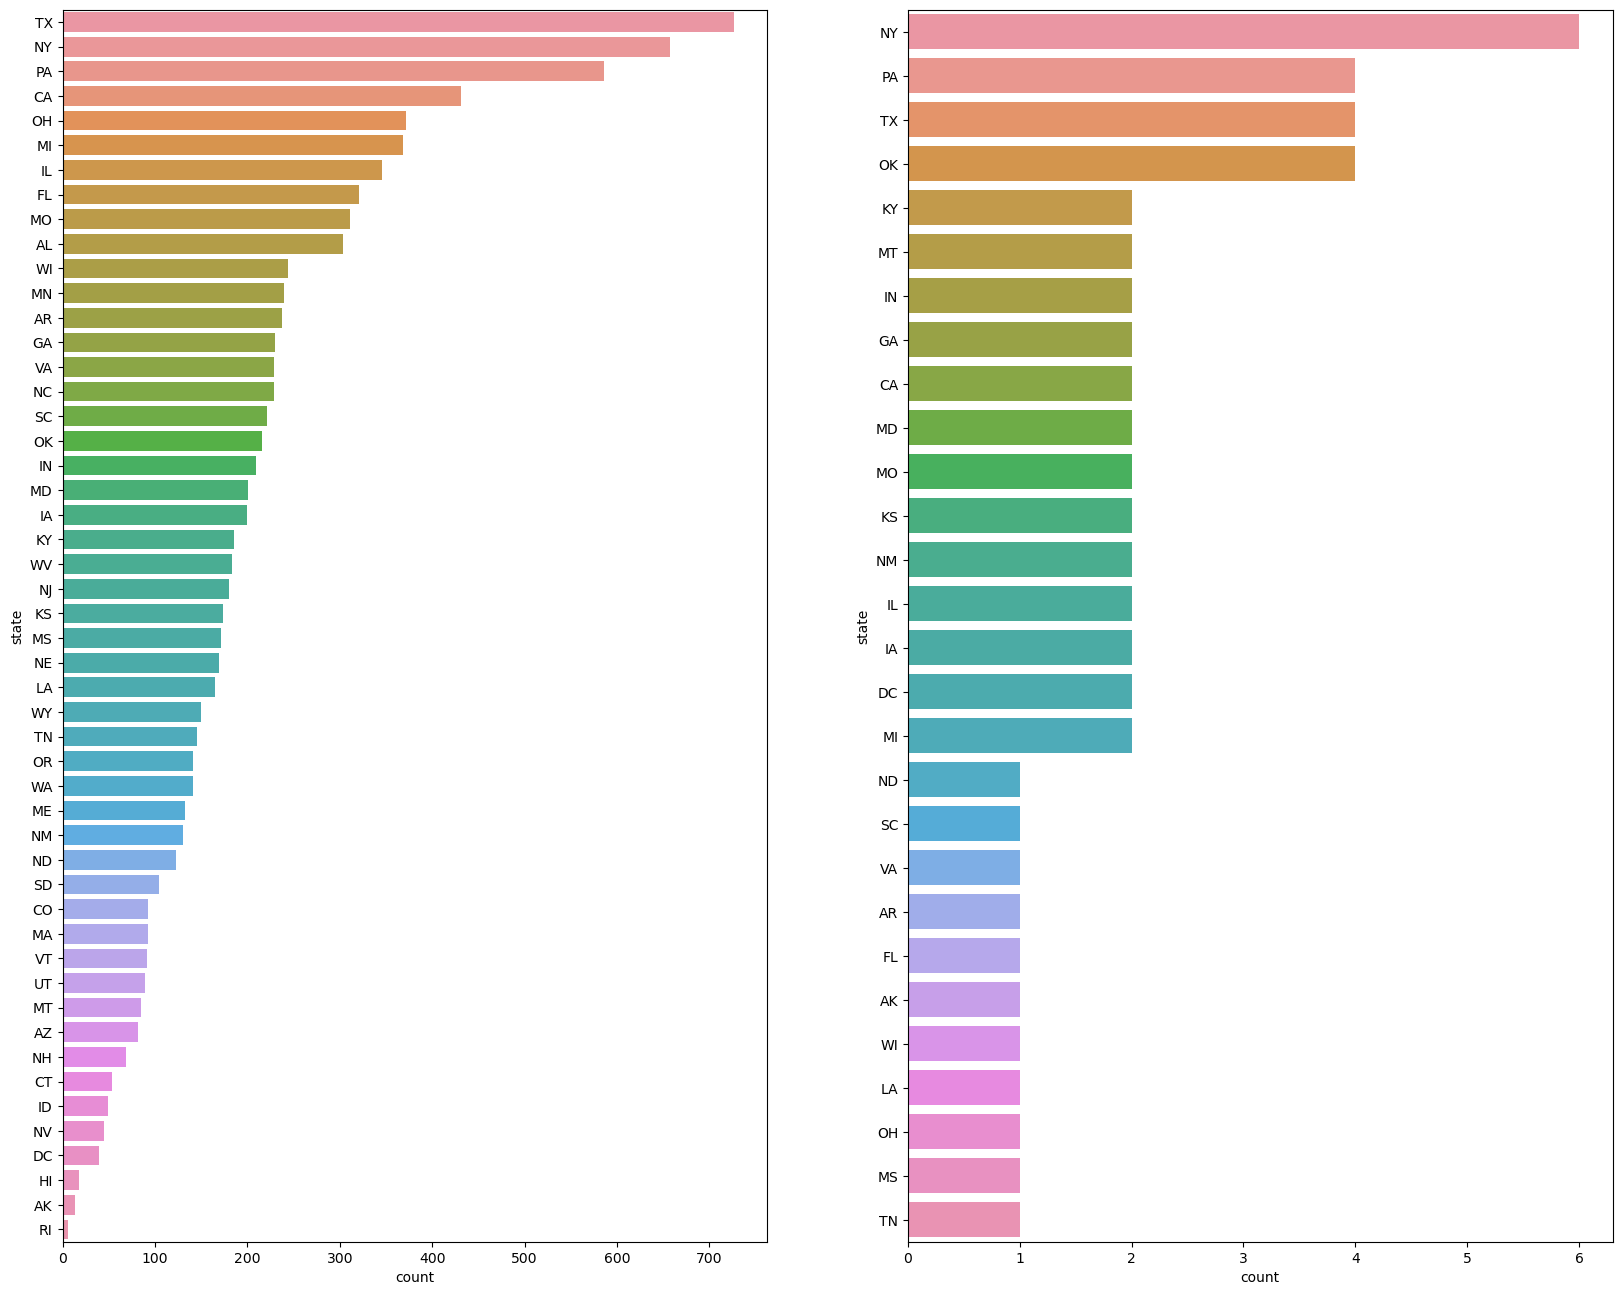

In [22]:
# state
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,16))
sns.countplot(data=cc1, y="state",
              order=cc1['state'].value_counts().index, ax=ax1)
sns.countplot(data=fraudOnly, y="state",
              order=fraudOnly['state'].value_counts().index, ax=ax2)

Is there a job or profession that tends to facilitate fraud transaction activity? Since the overall number of fraudulent transaction is so small for this data set, the results cannot be considered statisticaly significant. The distributions of variables such as "merchant" and "jobs" were ploted but no significant patterns were observed.


<Axes: xlabel='count', ylabel='merchant'>

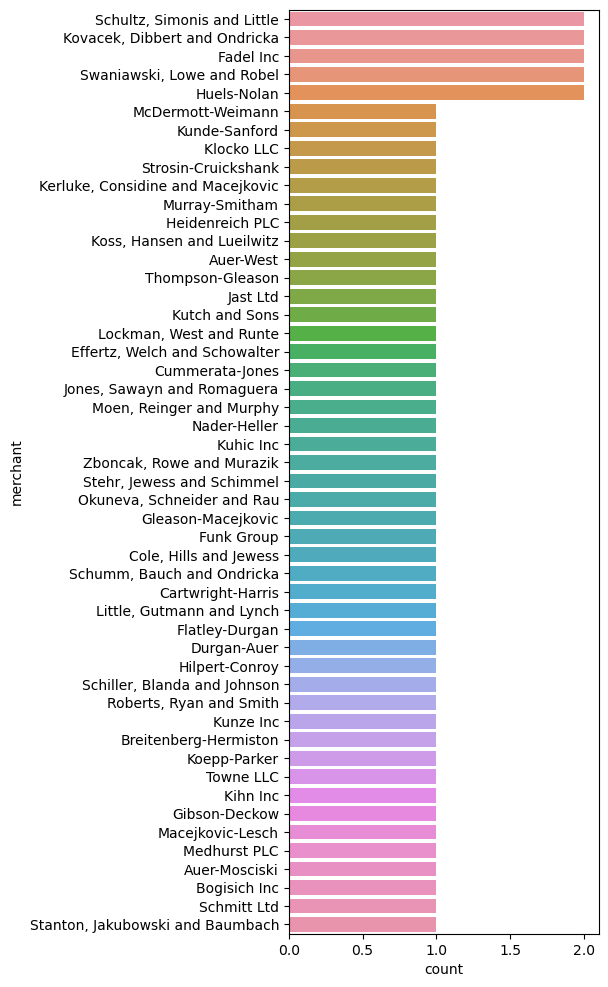

In [24]:
# merchant
# this will end up the same as categories, so just fraudOnly dataset
plt.figure(figsize=(4,12))
sns.countplot(data=fraudOnly, y="merchant",
              order=fraudOnly['merchant'].value_counts().index)

<Axes: xlabel='count', ylabel='job'>

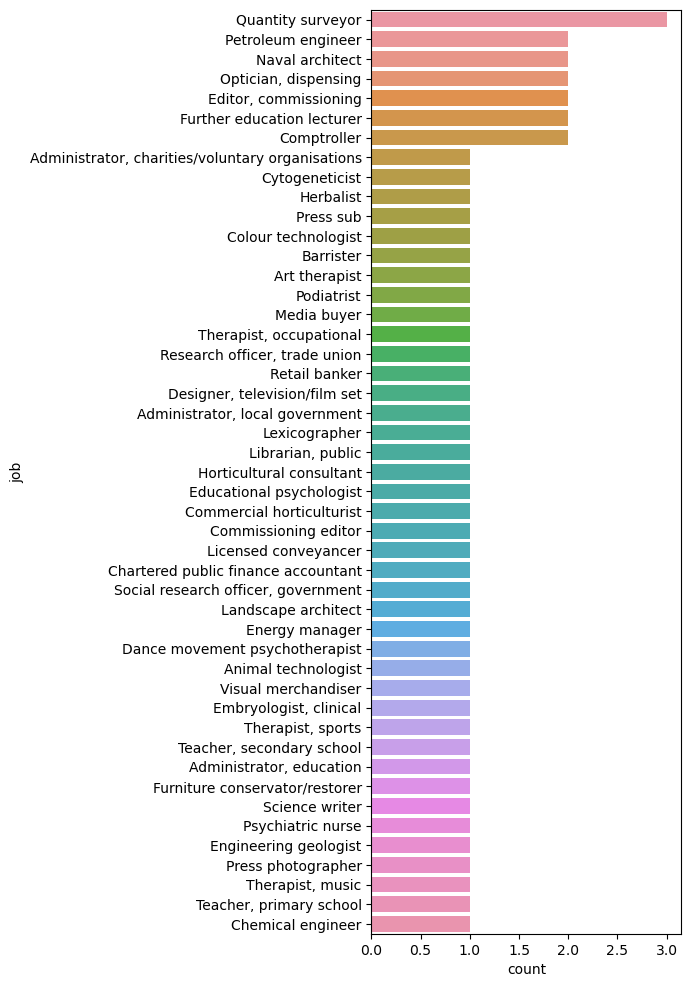

In [23]:
# job
# fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,16))
# sns.countplot(data=cc1, y="job",
#               order=cc1['job'].value_counts().index, ax=ax1)
# sns.countplot(data=fraudOnly, y="job",
#              order=fraudOnly['job'].value_counts().index,) ax=ax2)

# ope. Like I said, too many jobs to compare. Just look at the second graph.

plt.figure(figsize=(4,12))
sns.countplot(data=fraudOnly, y="job",
              order=fraudOnly['job'].value_counts().index,)

In [25]:
# num: amt*, gender(1/0), city_pop*, age*
# looked at gender a bit above and in R

A correlation analysis of all numerical variables was performed. The heatmap shows that strong correlations exist between location variables, and a mild correlation between fraud and amount. 

C:\Users\sinti\AppData\Local\Temp\ipykernel_17752\1863188923.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = cc1.corr()


<Axes: >

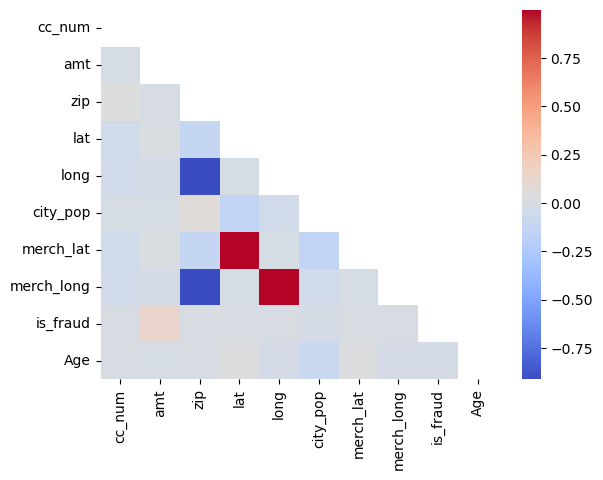

In [24]:
correlations = cc1.corr()
mask = np.triu(np.ones_like(correlations, dtype = bool))
correlations = correlations.mask(mask)

sns.heatmap(correlations, cmap='coolwarm')

In [26]:
# Sooo...just amount. =O
# Like it's cool to see the associations between lat, long, city_pop and zipcode
# So...the fact that is_fraud only has a relationship with amt is pretty telling

Amount is the only variable affecting whether a charge was fraudulent for this dataset. City population may be correlated with age, but it doesn't have a correlation with fraudulent credit charges.

<Axes: >

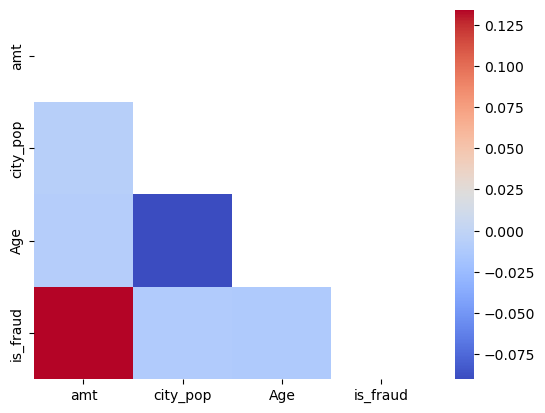

In [25]:
cc2 = cc1[["amt", "city_pop", "Age", "is_fraud"]]
# what I thought would be important

correlations = cc2.corr()
mask = np.triu(np.ones_like(correlations, dtype = bool))
correlations2 = correlations.mask(mask)

sns.heatmap(correlations2, cmap='coolwarm')

#### Fraud Classification Modeling with Random Forest

Next a Random Forest model was used to predict fraudulent activity. The data was separated into 80 - 20 train and test splits.
The ensemble decision trees model was able to identify the fraudulent transactions with an accuracy score of 0.99. To identify the weight each variable and its contribution to the model's performance, a feature_performance analysis was also executed.

The feature performance model confirmed the correlation map observed in the heatmap plot - the strongest contributor for the accurate predictions from the Random Forest model come from the relationship between fraudulent charges and the amount of the charge.

In [29]:
ccML = cc1[['gender','amt','zip','city_pop','merch_lat','merch_long','Age','is_fraud']]

In [30]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

df = pd.DataFrame(ccML)

# Select the features and target variable
features = df.drop('is_fraud', axis=1)
target = df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the random forest model
rf = RandomForestClassifier()

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
predictions = rf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print the confusion matrix
print("Confusion matrix:")
print(cm)

# Compute the classification report
cr = classification_report(y_test, predictions)

# Print the classification report
print("Classification report:")
print(cr)

# Compute the accuracy score
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy score
print("Accuracy:", accuracy)

Confusion matrix:
[[1986    0]
 [  13    1]]
Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1986
           1       1.00      0.07      0.13        14

    accuracy                           0.99      2000
   macro avg       1.00      0.54      0.57      2000
weighted avg       0.99      0.99      0.99      2000

Accuracy: 0.9935


In [31]:
df = pd.DataFrame(ccML)

# Select the features and target variable
features = df.drop('is_fraud', axis=1)
target = df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the random forest model
rf = RandomForestClassifier()

# Fit the model on the training data
rf.fit(X_train, y_train)

# Get the variable importance
importance = rf.feature_importances_

# Print the variable importance
for i, feature in enumerate(features.columns):
    print(f"{feature}: {importance[i]}")

gender: 0.015360160170728946
amt: 0.4187356431109128
zip: 0.08685964216927711
city_pop: 0.08534359407463622
merch_lat: 0.15568029344795017
merch_long: 0.15685340259100128
Age: 0.08116726443549353


#### Time Series Analysis

A time series analysis was used to determine if seasonality play a role in fraud activity. However due to the limited availability of data corresponding to approximately 6 months' worth of transactions from the year 2020, the analysis provided only a partial understanding of the overall picture. The absence of data from the first half of the year constrained the ability to draw comprehensive conclusions. Nevertheless, the analysis revealed spikes in the time series data, indicating that fraudulent charges tend to occur more frequently during specific periods of the year. On average, there was one spike per month, with a notable concentration during the fall months, potentially suggesting a connection to holidays. An ADF evaluation was conducted, revealing an initial appearance of seasonality; however, the test statistic displayed a more negative value than the critical values, indicating stationary data. To establish firm conclusions regarding the existence of seasonal patterns in fraudulent activities, a more extensive dataset spanning multiple years would be required for a comprehensive investigation.

Text(0.5, 1.0, 'fraud over time')

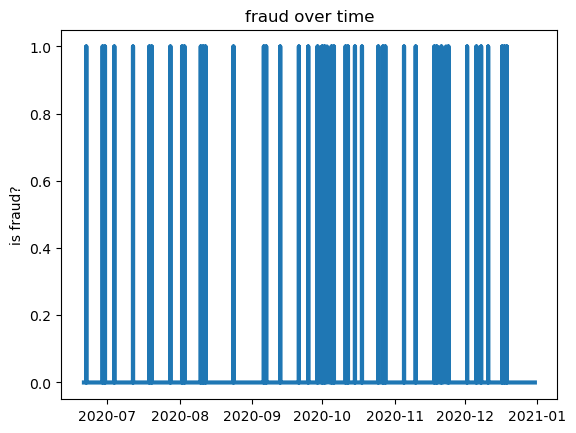

In [33]:
cc2 = cc1[['trans_date','is_fraud']]
cc2.set_index('trans_date',inplace=True)
cc2 = cc2.sort_index()

fig, ax = plt.subplots()
ax.plot(cc2['is_fraud'], linewidth=3)
ax.set_ylabel('is fraud?')
ax.set_title('fraud over time')

In [35]:
months = cc2.index.month
monthly_avg = cc2.groupby(months).is_fraud.mean()
monthly_avg

trans_date
6     0.005172
7     0.003215
8     0.004505
9     0.006375
10    0.012397
11    0.007728
12    0.002743
Name: is_fraud, dtype: float64

Text(0.5, 1.0, 'fraud over time')

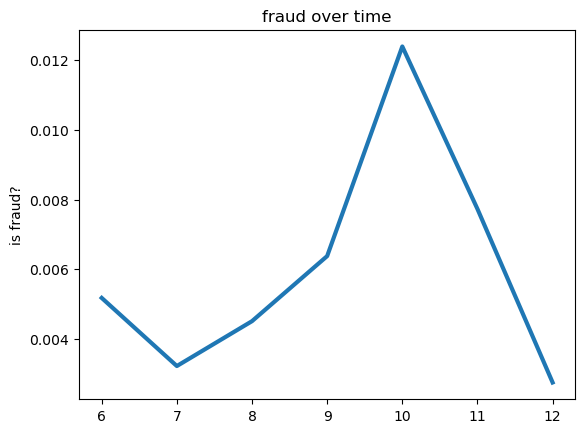

In [37]:
fig, ax = plt.subplots()
ax.plot(monthly_avg, linewidth=3)
ax.set_ylabel('is fraud?')
ax.set_title('fraud over time')

In [40]:
# Initially it appears that fraud happens toward end of the year.
# BUT this is % out of the month, not total transactions.

In [42]:
days = cc2.index.date
days

array([datetime.date(2020, 6, 21), datetime.date(2020, 6, 21),
       datetime.date(2020, 6, 21), ..., datetime.date(2020, 12, 31),
       datetime.date(2020, 12, 31), datetime.date(2020, 12, 31)],
      dtype=object)

In [43]:
daily_avg = cc2.groupby(days).is_fraud.mean()
daily_avg

2020-06-21    0.000000
2020-06-22    0.012658
2020-06-23    0.000000
2020-06-24    0.000000
2020-06-25    0.000000
                ...   
2020-12-27    0.000000
2020-12-28    0.000000
2020-12-29    0.000000
2020-12-30    0.000000
2020-12-31    0.000000
Name: is_fraud, Length: 194, dtype: float64

Text(0.5, 1.0, 'fraud over time')

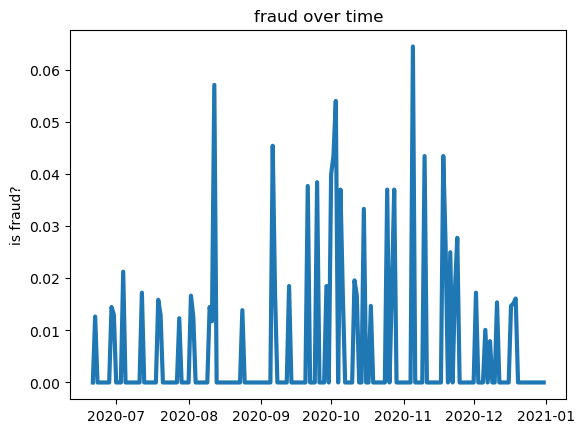

In [44]:
fig, ax = plt.subplots()
ax.plot(daily_avg, linewidth=3)
ax.set_ylabel('is fraud?')
ax.set_title('fraud over time')

In [45]:
# Ooooh that's the one. Looks like some seasonality. 
# I don't think there is enough time data to break it up. =(
# Of course there are other trends I want to look at,
# like categories and amt, but
# let's evaluate this one first really quick

### TIME SERIES EVALUATION

In [46]:
# EXPLORE - WHAT DOES THE ADF TEST TELL US?
# IS OUR TIME SERIES STATIONARY OR NOT?

result = adfuller(cc2['is_fraud'], autolag='AIC')

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -38.560675
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


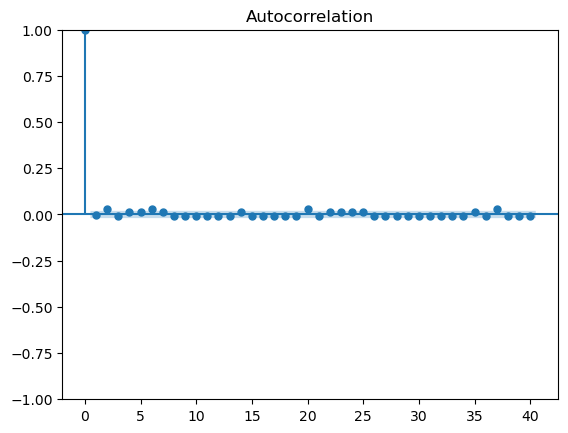

C:\Users\sinti\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


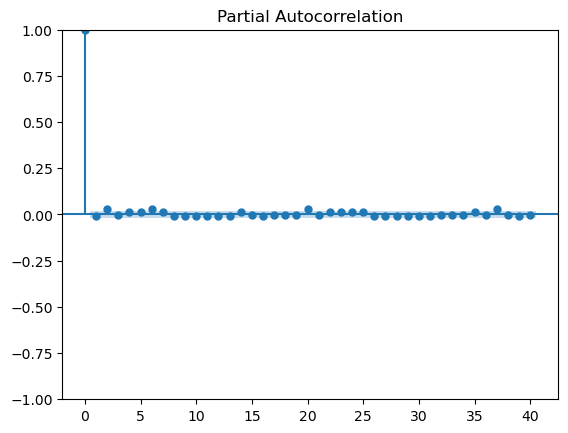

In [47]:
# EXPLORE - WHAT DO THE CORRELATION PLOTS TELL US ABOUT THE DATA?

plot_acf(cc2['is_fraud'], ax=plt.gca())
plt.show()

#pyplot.subplot(212)

plot_pacf(cc2['is_fraud'], ax=plt.gca())
plt.show()

In [49]:
# EXPLORE - WHAT DOES THE ADF TEST TELL US?
# IS OUR TIME SERIES STATIONARY OR NOT?

result = adfuller(daily_avg, autolag='AIC')

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.363132
p-value: 0.000000
Critical Values:
	1%: -3.465
	5%: -2.877
	10%: -2.575


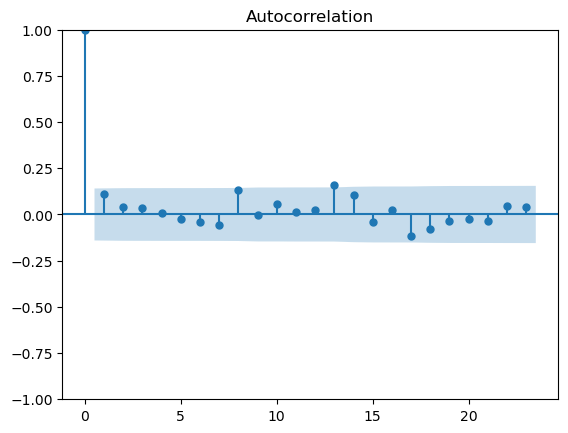

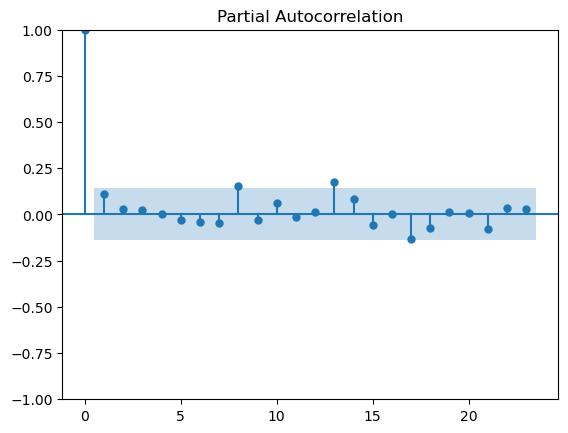

In [48]:
# EXPLORE - WHAT DO THE CORRELATION PLOTS TELL US ABOUT THE DATA?

plot_acf(daily_avg, ax=plt.gca())
plt.show()

#pyplot.subplot(212)

plot_pacf(daily_avg, ax=plt.gca())
plt.show()

### Conclusions

In this analysis, the potential of customer segmentation, fraud detection and default risk analysis were used to improve the overall credit risk assessment. These techniques offered valuable insights that can significantly enhance the accuracy of credit risk, strengthen risk management approaches, and optimize lending policies and procedures. While the analysis provided some promising results, challenges related to class imbalance were encountered, requiring further exploration and alternative techniques.

Customer segmentation analysis revealed distinct customer segments based on shared characteristics. By grouping customers with similar credit behavior patterns, lenders can gain insights into creditworthiness and tailor their risk assessment strategies. The Random Forest classifier achieved an accuracy score of 0.86, showing good performance in predicting non-approval (class 0). However, it struggled to identify instances of credit approval (class 1), indicating the need for further improvements.

Credit behavior analysis using XGBoost regression provided an accuracy score of 0.85 and an RMSE of 0.38. While it did not outperform the Random Forest model, it offered valuable insights into credit behavior patterns. However, both models faced challenges due to class imbalance, which limited their performance in predicting positive outcomes. Addressing class imbalance, such as through oversampling techniques, and class wheighting may improve the accuracy of credit risk assessment models.

Default risk analysis revealed correlations among payment and bill variables, providing insights into customers' payment patterns and risk profiles. The XGBoost and Random Forest models for default risk prediction once again faced challenges due to class imbalance. Despite the efforts to address class imbalance using RandomOverSampler, further parameter exploration is necessary to enhance model performance.

With the fraud detection analysis, due to the limited availability of data, encompassing only approximately 6 months from the second half of 2020, a comprehensive understanding of the dataset and fraudulent charges could not be achieved. The dataset's temporal and contextual limitations hindered the ability to draw firm conclusions about the nature of fraudulent transactions. Nonetheless, certain trends in fraudulent charges were identified, including a higher prevalence of online transactions and a correlation between the amount of the transactions and fraud were identified, as they tend to be much higher than the average transaction amount. It is important to note that further data, beyond this time frame, would be necessary to discern the distinguishing factors between fraudulent and non-fraudulent transactions accurately.

Based on the analysis, the following improvements can be recommended to improve the overall credit risk assessment:

- Handling Class Imbalance: Given the severity of class imbalance, exploring alternative techniques such as anomaly detection or one-class classification may provide better results. These methods can effectively identify instances of positive outcomes, improving the accuracy of risk assessment models.

- Feature Engineering: Consider incorporating additional features or derived variables that capture relevant information about credit behavior, customer demographics, or transaction history. This can provide a more comprehensive understanding of creditworthiness and enhance the models' predictive capabilities.

- Fine-Tuning Model Parameters: Continue exploring different hyperparameter settings and conducting parameter optimization for the chosen models. This process may involve adjusting the learning rate, tree depth, subsample ratio, or other parameters specific to the modeling techniques employed. Hyperparameter optimization can further enhance the models' performance and their ability to handle class imbalance.

- Ensemble Techniques: Investigate ensemble methods, such as stacking or boosting, to combine the strengths of multiple models. Ensemble techniques have the potential to improve predictions by leveraging the diverse characteristics of different models and mitigating the limitations of individual models.

In conclusion, leveraging customer segmentation, credit behavior analysis, default risk analysis, and fraud detection analysis can greatly enhance the overall credit risk assessment. While challenges related to class imbalance were encountered, the analysis provided valuable insights into credit behavior patterns and risk profiles. By implementing the recommended improvements and considering alternative techniques, lenders can refine their risk assessment strategies, optimize lending policies, and make more informed decisions in credit risk assessment and management.